In [394]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/murat/Library/CloudStorage/OneDrive-UniversityofRochester/UR_Projects/CampaignContribution_Winner_Kaggle/Data'

In [395]:
# train = pd.read_csv("./train_data_new.csv")
# test = pd.read_csv("./test_data_new.csv")

train = pd.read_csv('../training_data.csv')
test = pd.read_csv('../test_data.csv' )

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_77622/3097671531.py:4: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../training_data.csv')


In [396]:

cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio',
       #  'contrib_state_deg',
       # 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       # 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       # 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       # 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       # 'state_win_comm'
       ]
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]

# Missing Values analysis:

In [397]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city': No fake-missing values found.

Column 'zip_code':
          count
zip_code       
0.0         502
→ Found 502 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 502 rows from train DataFrame.


In [398]:
### Check fake missing values for test data

fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = test[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(test[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
# test.drop(index=rows_to_drop, inplace=True)
# test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city': No fake-missing values found.

Column 'zip_code':
          count
zip_code       
0.0         347
→ Found 347 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 347 rows from train DataFrame.


In [399]:
print(train.shape, test.shape)

(172346, 41) (115232, 41)


In [400]:
cols = ["governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd",
        "house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd",
        "senate_contribution_ratio",    "senate_contributions_sum_2010_usd", "contribution_sum_2010_usd",
        "us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd",
        "us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"
        ]
train[cols].iloc[1435:1438]


,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.0,0.0,497.78,0.0,0.00,497.78,0.0,0.0,497.78,0.981739,488.69,497.78,0.018261,9.09,497.78
1436,0.0,0.0,21.04,1.0,21.04,21.04,0.0,0.0,21.04,0.000000,0.00,21.04,0.0,0.00,21.04
1437,1.0,1000.0,1000.00,0.0,0.00,1000.00,0.0,0.0,1000.00,0.000000,0.00,1000.00,0.0,0.00,1000.00


In [401]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

In [402]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [403]:
# Drop states with count less than 5
state_counts = train['state'].value_counts()

# Filter to keep only states with at least 5 records
train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [404]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = test.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
# test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 2388
🔍 Number of duplicate rows in test: 1355
✅ Duplicates removed for train. New shape: (169932, 41)
✅ Duplicates removed for test. New shape: (115232, 41)


# Check association between categorical variables and target variable

In [405]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 19.4812, p-value = 0.0000e+00

📊 Analyzing 'city' with 8976 categories:
🧪 ANOVA → F/t-stat = 1.6964, p-value = 1.8365e-305

📊 Analyzing 'zip_code' with 15459 categories:
🧪 ANOVA → F/t-stat = 1.5333, p-value = 3.9360e-315

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.6039, p-value = 0.0000e+00

📊 Analyzing 'state' with 35 categories:
🧪 ANOVA → F/t-stat = 109.0540, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1084.1312, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    19.481193   0.000000e+00
3   specific_sector  ANOVA     8.603930   0.000000e+00
4             state  ANOVA   109.053999   0.000000e+00
5  contributor_type  ANOVA  1084.131187   0.000000e+00
2          zip_code  ANOVA     1.533257  3.936047e-315
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

#### Adding state_city then deleting city,zip_code:

In [406]:
# train['state_city']= train['state'] + '_' + train['city']
# test['state_city']= test['state'] + '_' + test['city']

In [407]:
## add state_city to categorical variables
# cat_vars.append('state_city')

In [408]:
train.drop([#'state',
            "city", "zip_code"], axis=1, inplace= True)
test.drop([#'state',
           "city", "zip_code"], axis=1, inplace= True)

for col in [#'state',
            "city", "zip_code","specific_sector","general_sector"]:
    if col in cat_vars:
        cat_vars.remove(col)

In [409]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [410]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               50382
Legal & Lobbying                30513
Retired / Homemakers            23641
Finance & Real Estate           15514
Health & Pharma                 10941
Public Sector & Campaigns        7755
Construction & Manufacturing     5545
Education & Nonprofit            5169
Other / Misc                     4382
Energy & Resources               4088
Retail, Food & Hospitality       3615
Labor & Trade                    2897
Technology & Telecom             1965
Transport & Logistics            1451
Policy & Single‑Issue             794
Entertainment & Media             680
Defense & Military                600
Name: count, dtype: int64


In [411]:
cat_vars.append('general_sector_new')

In [412]:
train.specific_sector.value_counts().to_clipboard()

## Drop specific sector column, since we already have bigger sector categories

In [413]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

## Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [414]:
# 1) Define the ratios you want to keep
ratio_cols = [

    ## ratio cols
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio',
]

count_total_cols =[
    # total counts
    'candidacy_count',
    'politician_count',
    'contribution_count',

    # contribution sum columns
    'contribution_sum_2010_usd',
]

ratio_total_cols = ratio_cols + count_total_cols

# 2) List all “base” columns to drop
# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_total_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
test.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())




→ Dropping these base columns:
 ['candidacy_democratic_count', 'candidacy_republican_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politi

In [415]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [416]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


governor_contribution_ratio has non-finite values.
house_and_assembly_contribution_ratio has non-finite values.
senate_contribution_ratio has non-finite values.
us_house_contribution_ratio has non-finite values.
us_senate_contribution_ratio has non-finite values.


In [417]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)


# # Check for non-finite values in test data and replace with small value:
def replace_nonfinite_with_small(df, cols):
    """Replace non-finite values (NaN, inf, -inf) with small value in specified columns."""
    # Replace only in specified columns
    for col in cols:
        bad_mask = ~np.isfinite(df[col])
        num_bad = bad_mask.sum()
        if num_bad > 0:
            print(f"→ IN TEST: Replacing {num_bad} non-finite values in column '{col}' with 0.1")
            df.loc[bad_mask, col] = 0.1
    return df


test= replace_nonfinite_with_small(test, test_num_vars)
# test = drop_nonfinite_rows(test, test_num_vars)

→ Dropping 190 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']
→ IN TEST: Replacing 106 non-finite values in column 'governor_contribution_ratio' with 0.1
→ IN TEST: Replacing 106 non-finite values in column 'house_and_assembly_contribution_ratio' with 0.1
→ IN TEST: Replacing 106 non-finite values in column 'senate_contribution_ratio' with 0.1
→ IN TEST: Replacin

## Check distribution of the different features

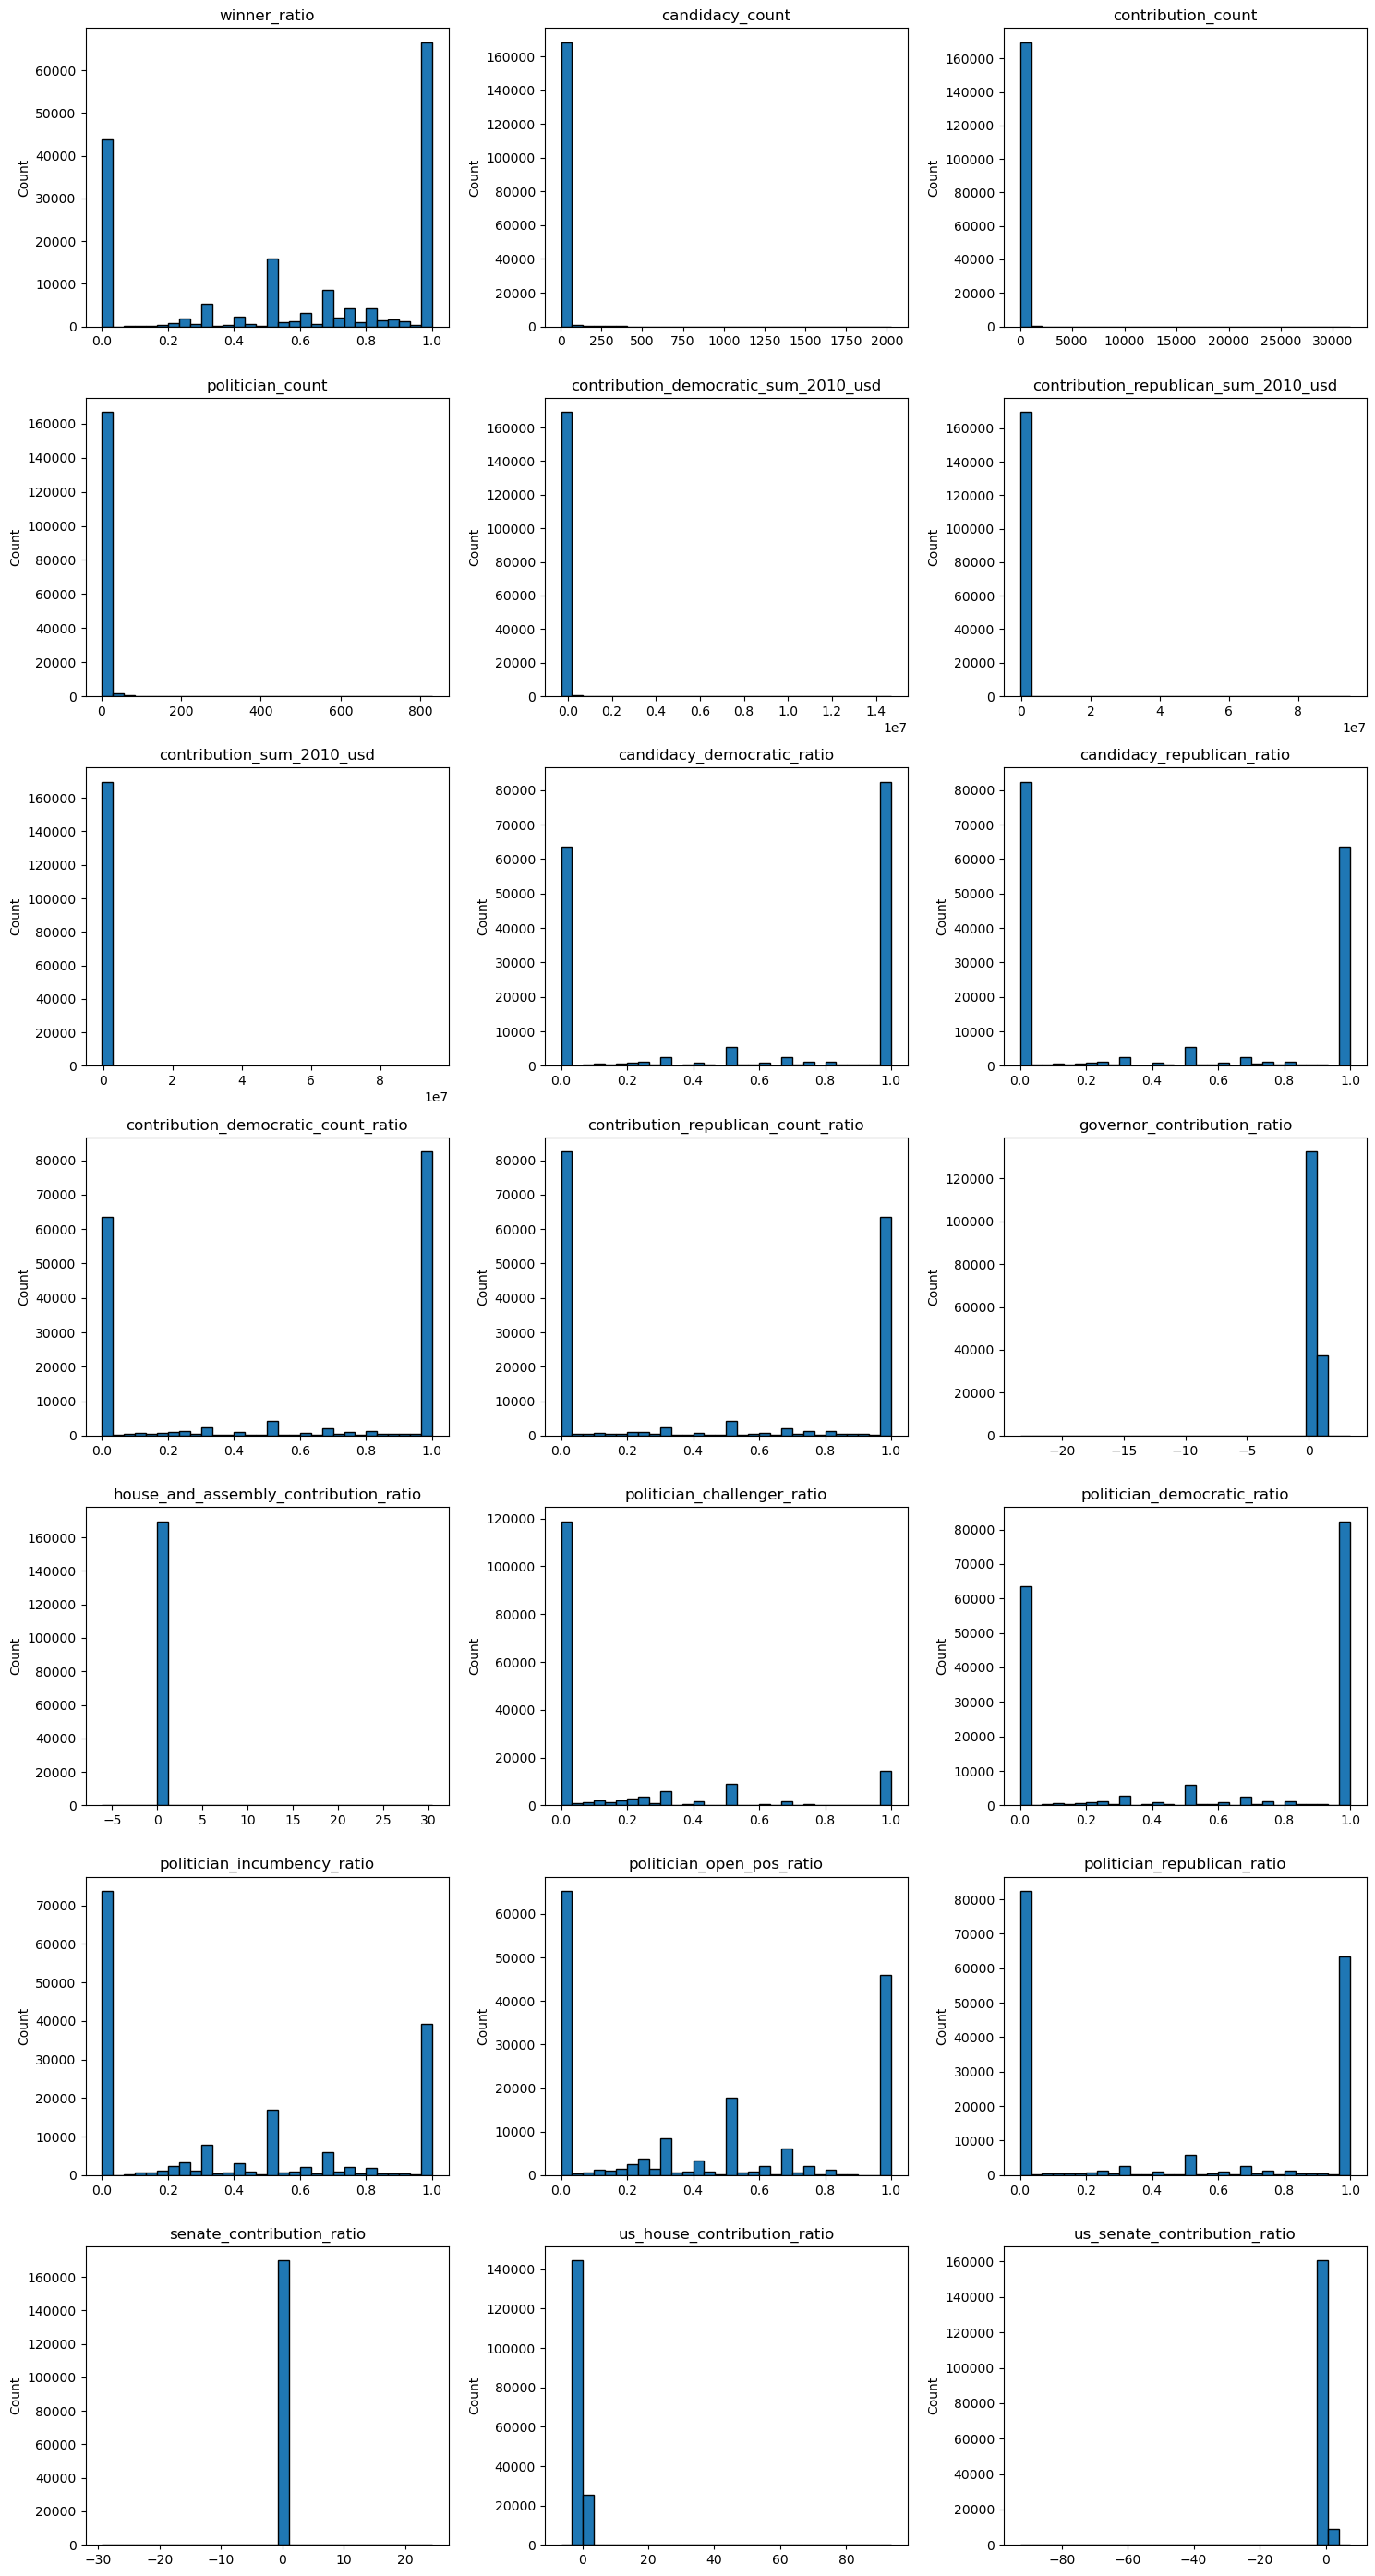

In [418]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


In [419]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


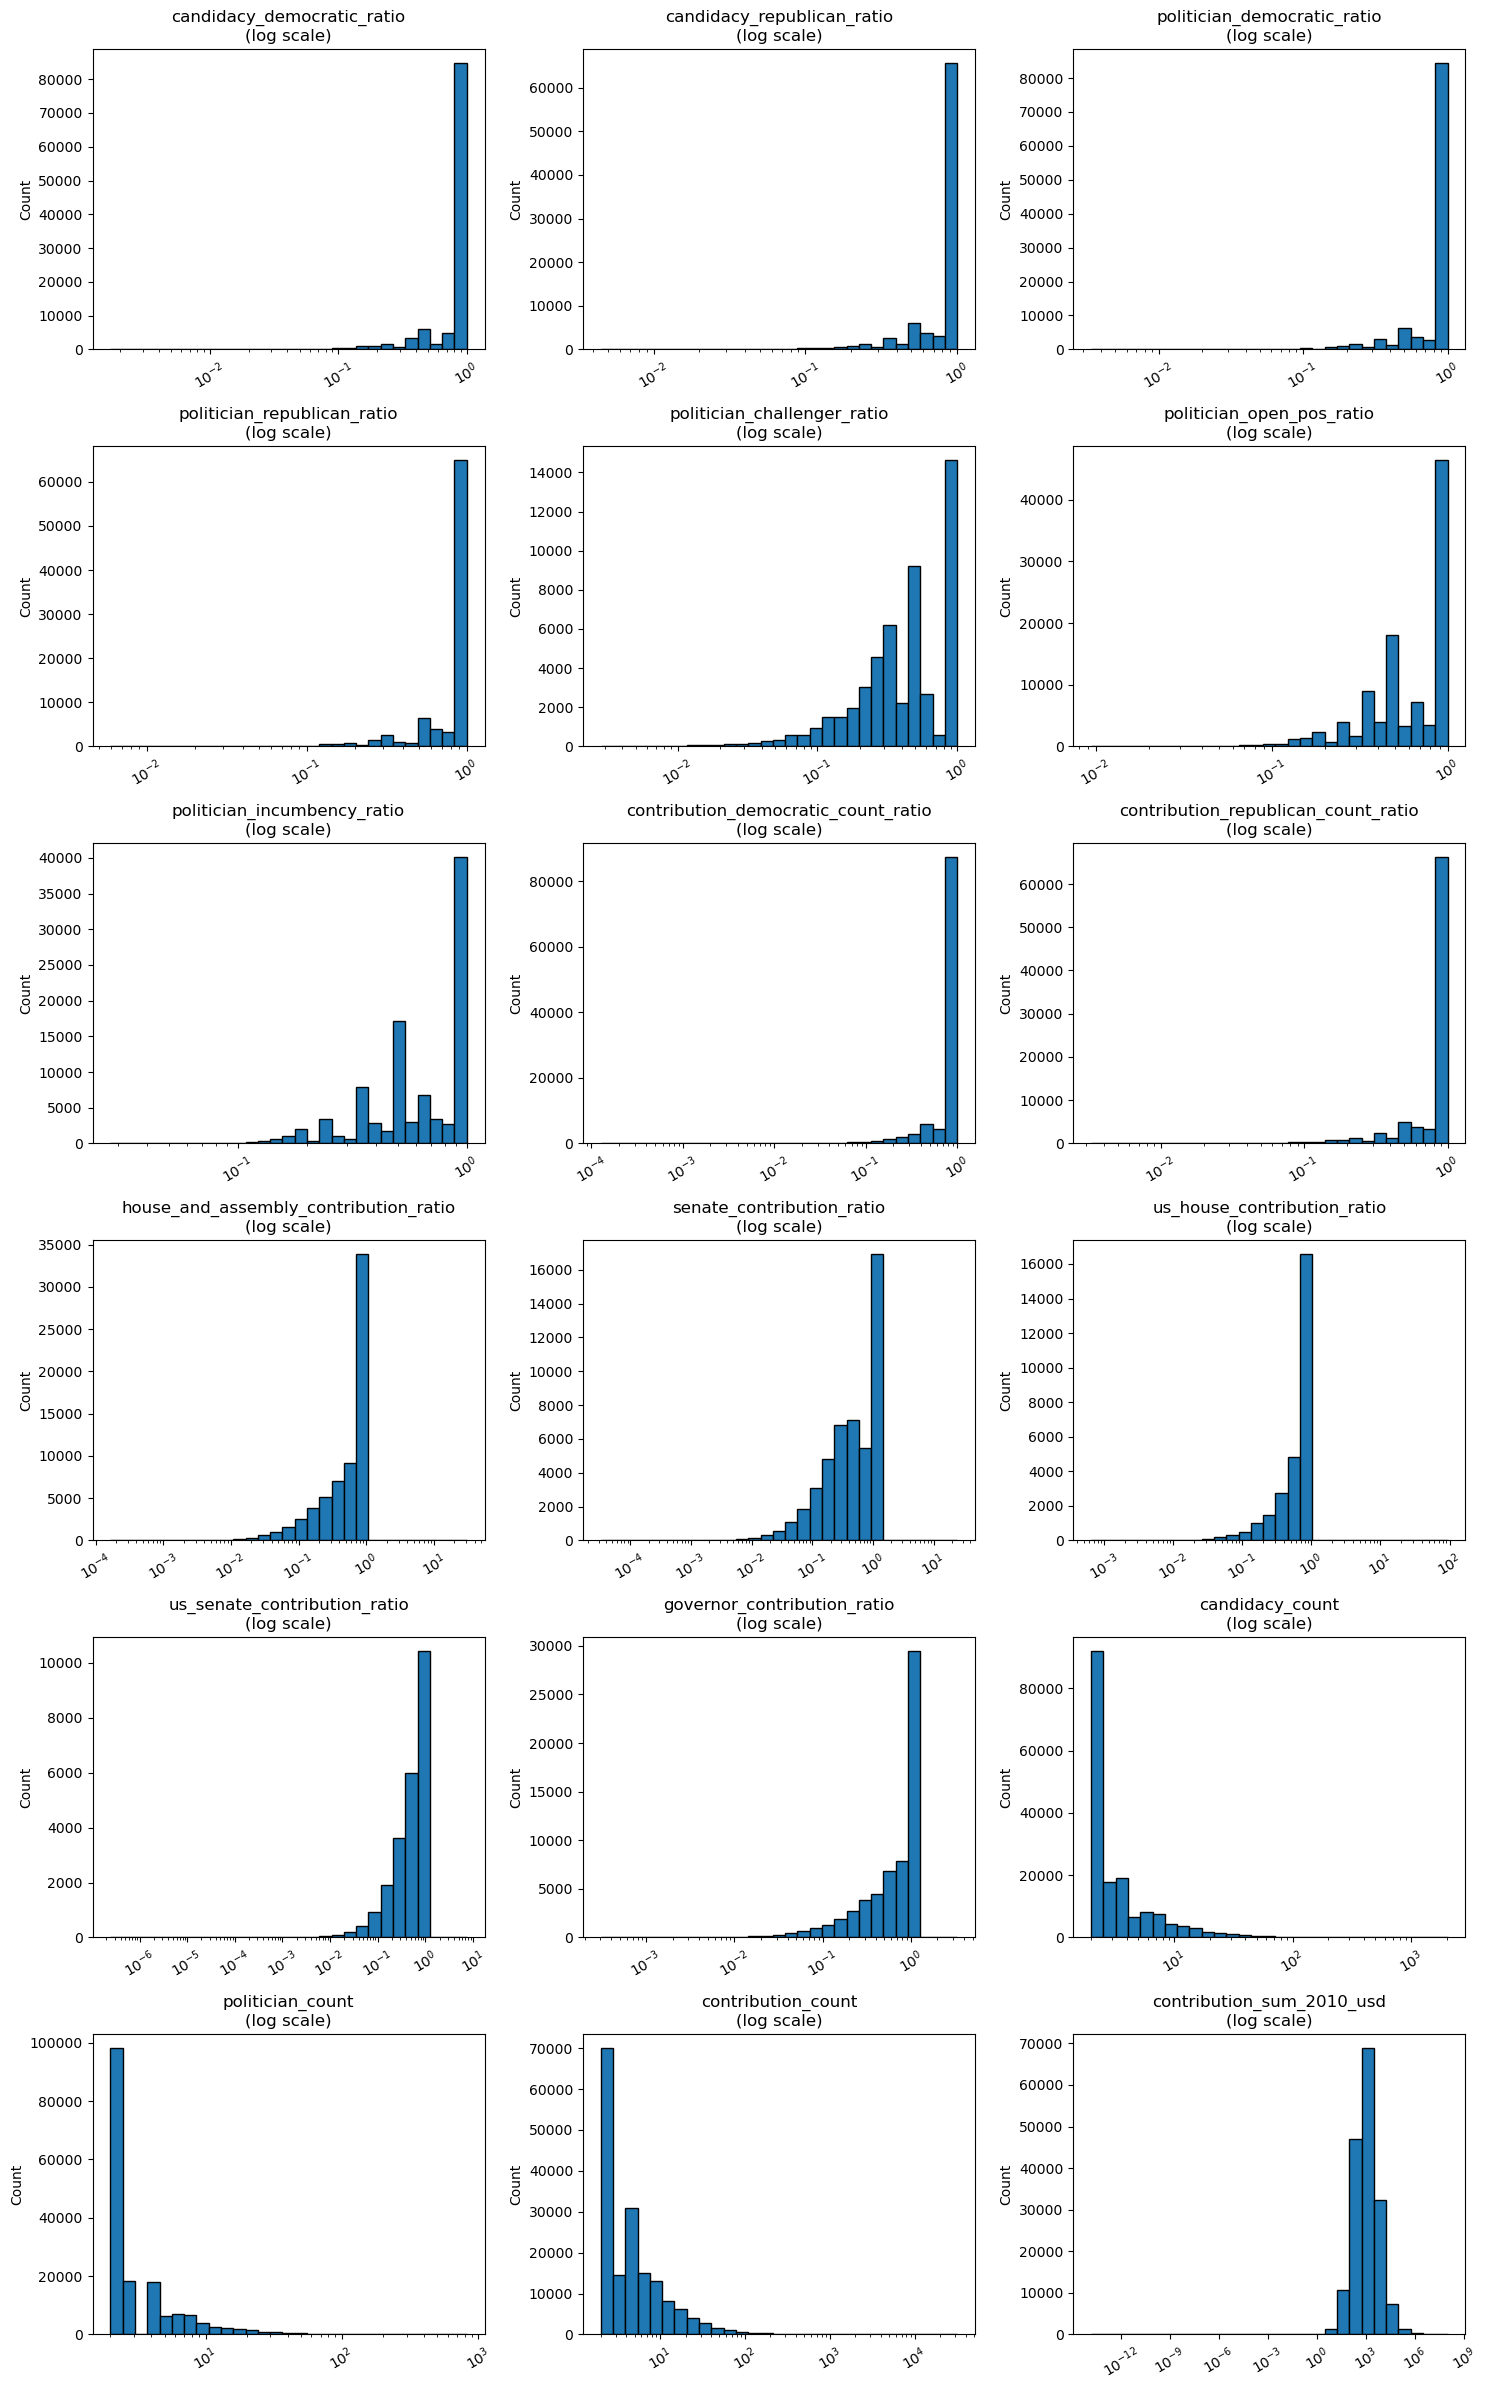

In [420]:

plot_histograms(train, ratio_total_cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)


## Treat ratio columns to fix skewness or zero and 1 inflated data

## Also introduce LOGIT data:

In [421]:
import numpy as np
import pandas as pd

THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)


# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())


Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.487852
politician_challenger_ratio      0.319964
politician_open_pos_ratio        0.255437
governor_contribution_ratio      0.137383
 

 Final columns after ratio selection:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'general_sector_new', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'polit

In [422]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [423]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_count', 'politician_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'general_sector_new', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit'],
      dtype='object')

In [424]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio"):
    
    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)
features["cat_vars"] = cat_vars
print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['state', 'contributor_type', 'general_sector_new']
Target:           winner_ratio
Numeric features: ['candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']


### Treat Network data columns

In [425]:
# train.state_city.nunique(), test.state_city.nunique()

In [426]:
features["cat_vars"]

['state', 'contributor_type', 'general_sector_new']

In [427]:

# network_cols = [
#     'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
#     'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
#     'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
#     'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
# ]

# plot_histograms(train, network_cols)


In [428]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import PowerTransformer



# # ---------------------------------
# # 2. Drop columns with zero variance
# # ---------------------------------
# non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
# print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# # ---------------------------------
# # 3. Apply a skew‑reducing transform
# #    a) log1p  (good for strictly‑positive features with many zeros)
# #    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# # ---------------------------------
# X = train[non_constant].copy()

# # a) log1p
# X_log  = np.log1p(X)

# # b) Yeo‑Johnson – uncomment if you have negatives
# # pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# # X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# # ---------------------------------
# # 4. Correlation with the target
# # ---------------------------------
# y = train['winner_ratio']

# pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
# spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

# print("\n=== Pearson (after log1p) ===")
# print(pearson)

# print("\n=== Spearman (rank‑based, raw values) ===")
# print(spearman)


In [429]:
# from sklearn.preprocessing import PowerTransformer

# # 1) fit Yeo-Johnson
# pt = PowerTransformer(method="yeo-johnson", standardize=False)
# X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
#                      columns=non_constant, index=train.index)

# # 2) Pearson corr on Yeo‑Johnson
# pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
# print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [430]:
# train.drop(network_cols, axis=1, inplace= True)
# test.drop(network_cols, axis=1, inplace= True)

In [431]:
# for col in network_cols:
#     features['train_num_vars'].remove(col)
#     # features['test_num_vars'].remove(col)

In [432]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
test_num_vars.append("contribution_total_sum_2010_usd")

In [433]:
def dropZeroRecords(df, cols):
    for col in cols:
        print(f'# Zero records in {col} are {df[df[col]==0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_total_sum_2010_usd"]
train = dropZeroRecords(train, cols)

# Replace 0 with small value in test
mask = (test["contribution_total_sum_2010_usd"] == 0)
print(f"Replacing {mask.sum()} zero-values in test contribution_total_sum_2010_usd")
test.loc[mask, "contribution_total_sum_2010_usd"] = 0.1

# test = dropZeroRecords(train, cols)

# Zero records in contribution_total_sum_2010_usd are (0, 23)
Replacing 106 zero-values in test contribution_total_sum_2010_usd


In [434]:
def dropNegRecords(df, col):
    for col in cols:
        print(f'# Neg records in {col} are {df[df[col]<0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]


### INSTEAD OF DROPPING NEGATIVES, CLIP THEM TO 0.1
# Clip negatives safely to 0.1
train[cols] = train[cols].clip(lower=0.1)
test[cols] = test[cols].clip(lower=0.1)




# train = dropNegRecords(train, cols)
# print("\n\n")
# test = dropNegRecords(test, cols)

In [435]:
import numpy as np
import pandas as pd

money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums, eps=1e-6):
    # 1) raw sums → log (we dropped total_sum zeros upstream)
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
    
    # 2) zero‐flags only for dem & rep sums
    for col in money_sums[:-1]:  # skip the total_sum
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 3) compute share ratios directly
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )
    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )

    # 4) flags for ratio boundaries
    df["dem_sum_ratio_is_zero"] = (df["dem_sum_ratio"] == 0).astype(int)
    df["dem_sum_ratio_is_one"]  = (df["dem_sum_ratio"] == 1).astype(int)
    df["rep_sum_ratio_is_zero"] = (df["rep_sum_ratio"] == 0).astype(int)
    df["rep_sum_ratio_is_one"]  = (df["rep_sum_ratio"] == 1).astype(int)

    # 5) logit‐transform the ratios (safe since denom≠0)
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        r = df[col].clip(eps, 1 - eps)
        df[f"{col}_logit"] = np.log(r / (1 - r))

    return df

# Apply to both train and test (after you’ve dropped total_sum == 0 rows)
train = add_share_features(train, money_sums)
test  = add_share_features(test,  money_sums)


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [436]:
features['cat_vars']

['state', 'contributor_type', 'general_sector_new']

In [437]:
# train.state_city.nunique(), test.state_city.nunique()

In [438]:
# Linear or GLM (no penalty)
linear_keep = [
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio_logit",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

# Linear with Ridge/Lasso
linear_keep_penalised = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

     # 2) wasn’t zero? (flag)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",
    
]

# Tree‑based
tree_keep = [
    # 1. raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
    # 2. raw share ratio
    "dem_sum_ratio",
]

# Neural network (after StandardScaler)
nn_keep = [
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

######### Linear Models ########
# features_keep_penalised = create_feature_lists(train)
# features["train_num_vars"] = [c for c in nn_keep if c in train.columns]
# features["train_num_vars"] += [col for col in features_keep_penalised["train_num_vars"]
#                                if col not in features["train_num_vars"]]

# features["binary_flag_vars"] += [col for col in features_keep_penalised["binary_flag_vars"]
#                                if col not in features["binary_flag_vars"]]

# features["logit_vars"] += [col for col in features_keep_penalised["logit_vars"]
#                                if col not in features["logit_vars"]]

####### Old logic
features_tree = create_feature_lists(train)
features["train_num_vars"] += [col for col in features_tree["train_num_vars"]
                               if col not in features["train_num_vars"]]

features["binary_flag_vars"] += [col for col in features_tree["binary_flag_vars"]
                               if col not in features["binary_flag_vars"]]

features["logit_vars"] += [col for col in features_tree["logit_vars"]
                               if col not in features["logit_vars"]]


In [439]:
## Dropping redundance columns

def drop_extra_cols(df, features, cols):
    features["train_num_vars"] = [c for c in features["train_num_vars"] if c not in cols]
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True)
    return df, features


cols = ["dem_sum_ratio", "rep_sum_ratio"]
train, features = drop_extra_cols(train, features, cols)
test, features = drop_extra_cols(test, features, cols)  

In [440]:
'dem_sum_ratio' in features['train_num_vars']

False

In [441]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_count', 'politician_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'general_sector_new', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_demo

In [442]:
features["cat_vars"]

['state', 'contributor_type', 'general_sector_new']

In [443]:
set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) -set(train.columns)

set()

In [444]:
set(train.columns) - set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) 

{'winner_ratio'}

In [445]:
features['train_num_vars']

['candidacy_count',
 'contribution_count',
 'politician_count',
 'contribution_democratic_sum_2010_usd',
 'contribution_republican_sum_2010_usd',
 'contribution_sum_2010_usd',
 'politician_challenger_ratio_logit',
 'politician_open_pos_ratio_logit',
 'politician_incumbency_ratio_logit',
 'governor_contribution_ratio_logit',
 'contribution_total_sum_2010_usd',
 'contribution_democratic_sum_2010_usd_log',
 'contribution_republican_sum_2010_usd_log',
 'contribution_total_sum_2010_usd_log',
 'dem_sum_ratio_logit',
 'rep_sum_ratio_logit']

### Keep only relevant columns and drop redundant columns

In [446]:
features['train_num_vars'] = tree_num_keep = [
    "candidacy_count",
    "contribution_count",
    "politician_count",
    "contribution_total_sum_2010_usd",      # raw magnitude
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit"
]
cols_to_drop = [
    # Raw party-specific money sums — redundant with total + ratio
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",

    # Duplicate total (if contribution_total_sum_2010_usd already exists)
    "contribution_sum_2010_usd",

    # Log-transformed money sums — redundant for trees
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

    # Perfectly anti-correlated with dem_sum_ratio_logit
    "rep_sum_ratio_logit"
]

train.drop(columns=cols_to_drop, errors="ignore", inplace=True)
test.drop(columns=cols_to_drop, errors="ignore", inplace=True)


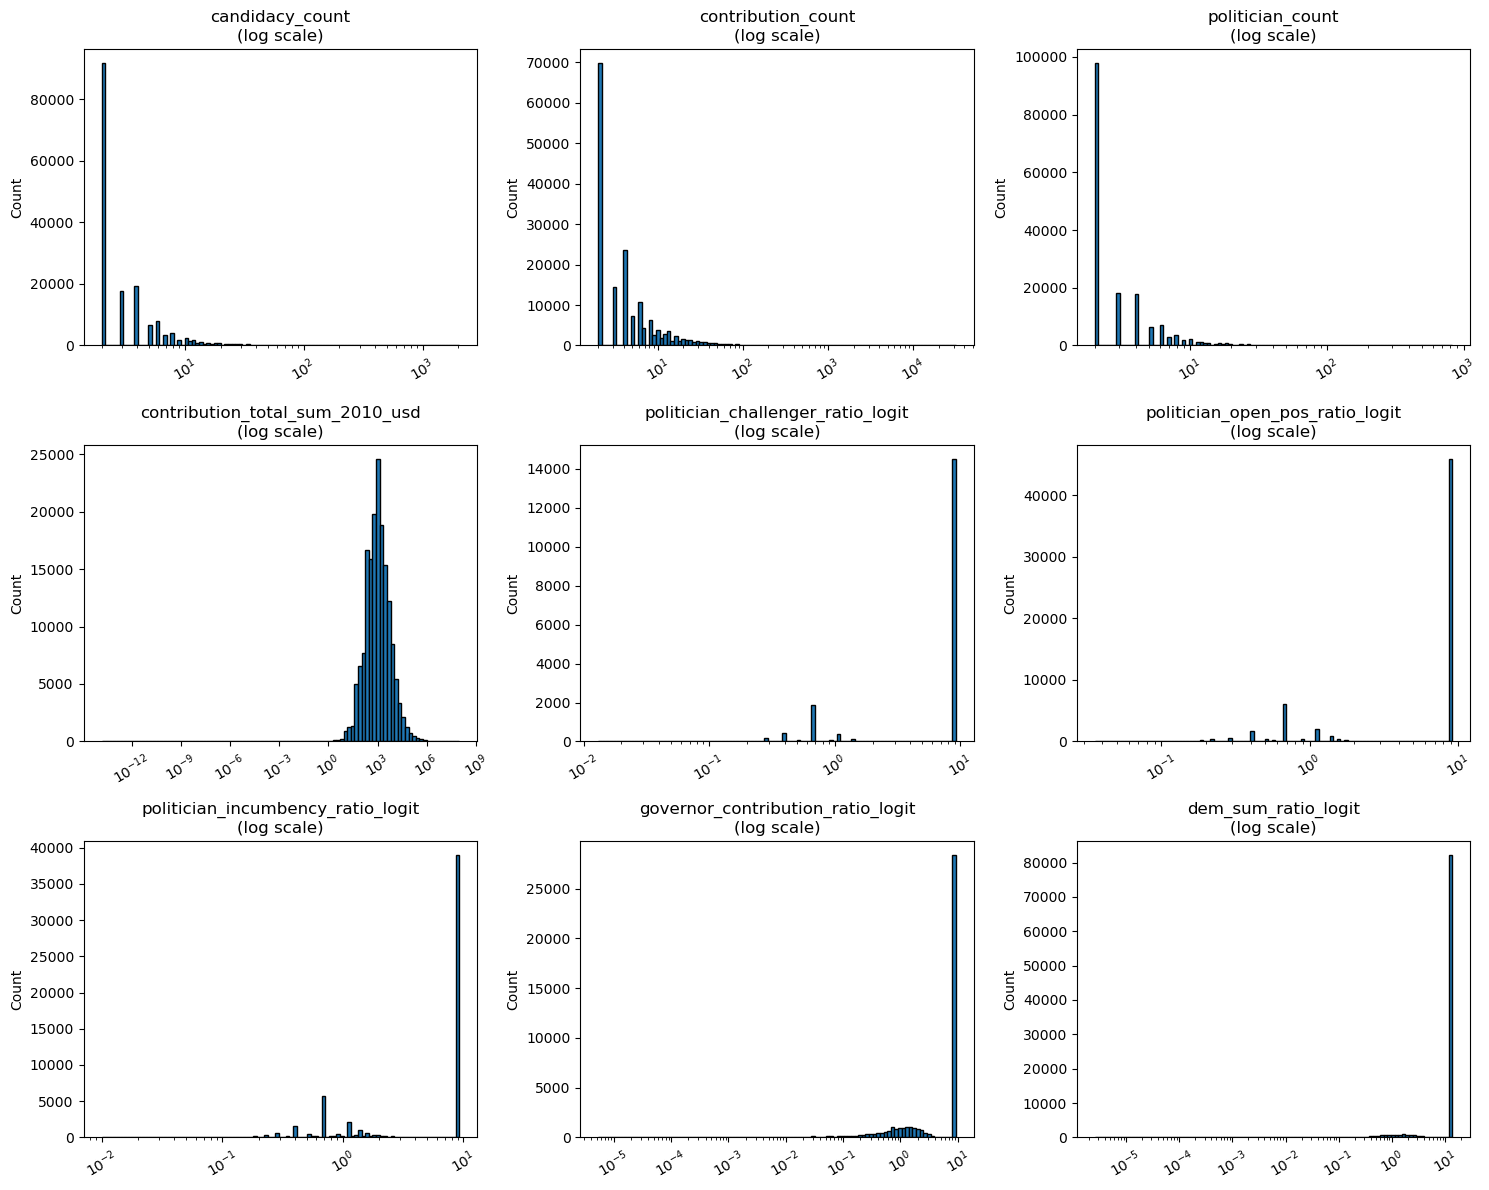

In [447]:


plot_histograms(train, features['train_num_vars'], bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [448]:
train_bkp = train.copy()

In [449]:
features['train_num_vars']

['candidacy_count',
 'contribution_count',
 'politician_count',
 'contribution_total_sum_2010_usd',
 'politician_challenger_ratio_logit',
 'politician_open_pos_ratio_logit',
 'politician_incumbency_ratio_logit',
 'governor_contribution_ratio_logit',
 'dem_sum_ratio_logit']

In [450]:
import numpy as np
from scipy.stats import skew


# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in features['train_num_vars']}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  candidacy_count       26.478
  contribution_count    236.608
  politician_count      19.056
  contribution_total_sum_2010_usd  256.969
  politician_challenger_ratio_logit   1.541
  politician_open_pos_ratio_logit   0.243
  politician_incumbency_ratio_logit   0.390
  governor_contribution_ratio_logit   1.045
  dem_sum_ratio_logit   -0.156


### Handle outleirs, if needed

In [451]:
# cap = train["contribution_count"].quantile(0.99)
# train["contribution_count"] = train["contribution_count"].clip(upper=cap)
# test ["contribution_count"] = test["contribution_count"].clip(upper=cap)


### Drop actual contribution_sum columns for both REP and DEM

In [452]:
#### no need to drop for this experiment

# cols_to_drop = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_total_sum_2010_usd']

# train, features = drop_extra_cols(train, features, cols_to_drop)
# test, features = drop_extra_cols(test, features, cols_to_drop)

## Check VIF among numerical columns

In [453]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                             feature        VIF
0                    candidacy_count  18.633281
2                   politician_count  17.273512
1                 contribution_count   6.788979
3    contribution_total_sum_2010_usd   4.862662
5    politician_open_pos_ratio_logit   2.049203
6  politician_incumbency_ratio_logit   1.787934
7  governor_contribution_ratio_logit   1.396942
4  politician_challenger_ratio_logit   1.387286
8                dem_sum_ratio_logit   1.097040


## Check correlation of numerical variables with target variable

In [454]:

# Calculate correlations
correlations = train[features['train_num_vars']].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
politician_incumbency_ratio_logit    0.501352
politician_challenger_ratio_logit   -0.317267
politician_open_pos_ratio_logit     -0.248302
governor_contribution_ratio_logit   -0.144270
politician_count                     0.060565
candidacy_count                      0.057562
dem_sum_ratio_logit                 -0.033991
contribution_count                   0.022226
contribution_total_sum_2010_usd      0.010692
dtype: float64


In [455]:
# Compute Spearman correlation between each train_num_var and the target
spearman = train[features["train_num_vars"]].apply(
    lambda col: col.corr(train["winner_ratio"], method="spearman")
).sort_values(ascending=False)

spearman


politician_incumbency_ratio_logit    0.487625
contribution_total_sum_2010_usd      0.068457
candidacy_count                      0.017025
politician_count                    -0.024910
contribution_count                  -0.034569
dem_sum_ratio_logit                 -0.035353
governor_contribution_ratio_logit   -0.137890
politician_open_pos_ratio_logit     -0.254993
politician_challenger_ratio_logit   -0.320408
dtype: float64

### Below column is found to be least correlated with tar var

In [456]:
"dem_sum_ratio_logit" in train.columns

True

In [457]:
# to_drop = ["dem_sum_ratio_logit"]
to_drop = []


train.drop(columns=to_drop, inplace=True, errors="ignore")
test .drop(columns=to_drop, inplace=True, errors="ignore")

# features['train_num_vars'].remove(to_drop[0])

In [458]:
"dem_sum_ratio_logit" in train.columns

True

In [459]:
# features['train_num_vars'].remove("dem_sum_ratio_logit")

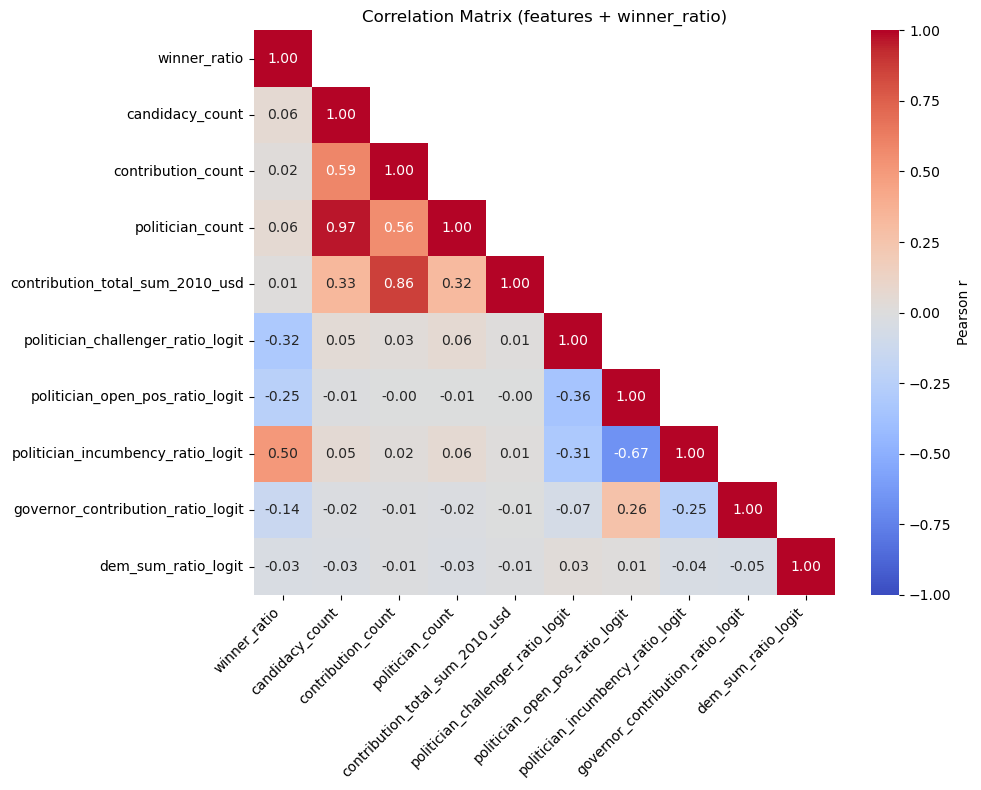

In [460]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Build list with winner_ratio first so its correlations sit on the diagonal
vars_for_corr = [features["tar_var"]] + features["train_num_vars"]

# 2) Compute Pearson correlation matrix
corr = train[vars_for_corr].corr()

# 3) Create a mask for the upper triangle (k=1 masks above the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# 4) Plot heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,         # show the correlation coefficients
    fmt=".2f",          # two decimal places
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar_kws={"label": "Pearson r"}
)

# 5) Tidy up labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix (features + winner_ratio)")
plt.tight_layout()
plt.show()


### Pipeline to split data, encode categorical columns, and then model building

In [461]:
# train.state_city.nunique(), test.state_city.nunique()

In [462]:
set(train.columns) - set(test.columns),set(test.columns) - set(train.columns)

(set(), set())

In [463]:
# train.state_city.nunique(), test.state_city.nunique()   

### APPLYING FREQUENCY LABELING
Since I used state_city which has 19643 unique values, it is not possible using OHE on it. I will change it to a numeric column after frew encoding:


In [464]:
# # Frequency encode state_city
# state_city_freq = train['state_city'].value_counts().to_dict()          

# train['state_city_freq'] = train['state_city'].map(state_city_freq)
# test['state_city_freq']  = test['state_city'].map(state_city_freq)

# train['state_city_freq'] = np.log1p(train['state_city_freq'])
# test['state_city_freq']  = np.log1p(test['state_city_freq'])


# # Optional: fill unknown test cities with small value (e.g., 1)
# test['state_city_freq'] = test['state_city_freq'].fillna(1)

# #And now drop state_city from both train and test
# train.drop('state_city', axis=1, inplace=True)
# test.drop('state_city', axis=1, inplace=True)
# #and remove them from feature lists catogorical variables and add to numerical:
# features['cat_vars'].remove('state_city')
# features['train_num_vars'].append('state_city_freq')


In [465]:
features

{'logit_vars': ['politician_challenger_ratio_logit',
  'politician_open_pos_ratio_logit',
  'politician_incumbency_ratio_logit',
  'governor_contribution_ratio_logit',
  'dem_sum_ratio_logit',
  'rep_sum_ratio_logit'],
 'binary_flag_vars': ['politician_challenger_ratio_is_zero',
  'politician_challenger_ratio_is_one',
  'politician_open_pos_ratio_is_zero',
  'politician_open_pos_ratio_is_one',
  'politician_incumbency_ratio_is_zero',
  'politician_incumbency_ratio_is_one',
  'governor_contribution_ratio_is_zero',
  'governor_contribution_ratio_is_one',
  'contribution_democratic_sum_2010_usd_is_zero',
  'contribution_republican_sum_2010_usd_is_zero',
  'dem_sum_ratio_is_zero',
  'dem_sum_ratio_is_one',
  'rep_sum_ratio_is_zero',
  'rep_sum_ratio_is_one'],
 'tar_var': 'winner_ratio',
 'train_num_vars': ['candidacy_count',
  'contribution_count',
  'politician_count',
  'contribution_total_sum_2010_usd',
  'politician_challenger_ratio_logit',
  'politician_open_pos_ratio_logit',
  'polit

In [466]:
train.columns, test.columns

(Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
        'contribution_count', 'politician_count', 'general_sector_new',
        'politician_challenger_ratio_is_zero',
        'politician_challenger_ratio_is_one',
        'politician_challenger_ratio_logit',
        'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
        'politician_open_pos_ratio_logit',
        'politician_incumbency_ratio_is_zero',
        'politician_incumbency_ratio_is_one',
        'politician_incumbency_ratio_logit',
        'governor_contribution_ratio_is_zero',
        'governor_contribution_ratio_is_one',
        'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
        'contribution_democratic_sum_2010_usd_is_zero',
        'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
        'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
        'dem_sum_ratio_logit'],
       dtype='object'),
 Index(['

### SAVE DATA FILES:

In [467]:
train_bkp = train.copy()
test_bkp = test.copy()
train_bkp.to_csv("train_bkp.csv", index=False)
test_bkp.to_csv("test_bkp.csv", index=False)

In [391]:
train.columns, test.columns

(Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
        'contribution_count', 'politician_count', 'general_sector_new',
        'politician_challenger_ratio_is_zero',
        'politician_challenger_ratio_is_one',
        'politician_challenger_ratio_logit',
        'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
        'politician_open_pos_ratio_logit',
        'politician_incumbency_ratio_is_zero',
        'politician_incumbency_ratio_is_one',
        'politician_incumbency_ratio_logit',
        'governor_contribution_ratio_is_zero',
        'governor_contribution_ratio_is_one',
        'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
        'contribution_democratic_sum_2010_usd_is_zero',
        'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
        'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
        'dem_sum_ratio_logit'],
       dtype='object'),
 Index(['

In [468]:
train.state.nunique(), test.state.nunique()

(35, 42)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # 1. Instantiate LabelEncoder
# le_state = LabelEncoder()

# # 2. Fit on combined data (train + test 'state' values together)
# combined_states = pd.concat([train['state'], test['state']])
# le_state.fit(combined_states)

# # 3. Transform separately
# train['state_le'] = le_state.transform(train['state'])
# test['state_le']  = le_state.transform(test['state'])

# print("✅ Label encoding done on 'state' column.")

# #Drop original 'state' column
# train.drop('state', axis=1, inplace=True)
# test.drop('state', axis=1, inplace=True)

# features['cat_vars'].remove('state')
# features['train_num_vars'].append('state_le')

✅ Label encoding done on 'state' column.


In [469]:
features['cat_vars']

['state', 'contributor_type', 'general_sector_new']

In [470]:
features['train_num_vars']

['candidacy_count',
 'contribution_count',
 'politician_count',
 'contribution_total_sum_2010_usd',
 'politician_challenger_ratio_logit',
 'politician_open_pos_ratio_logit',
 'politician_incumbency_ratio_logit',
 'governor_contribution_ratio_logit',
 'dem_sum_ratio_logit']

In [471]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_count', 'politician_count', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
       'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
       'dem_sum_ratio_logit'],
      dtype='object')

In [472]:
'state' in train.columns, 'state' in test.columns

(True, True)

In [475]:
# ╭───────────────────────────────────────────────────────────────╮
# │ 0 · IMPORTS                                                   │
# ╰───────────────────────────────────────────────────────────────╯
import time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import GradientBoostingRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess

# ╭───────────────────────────────────────────────────────────────╮
# │ 1 · DATA SPLIT                                               │
# ╰───────────────────────────────────────────────────────────────╯
train = train_bkp.copy()                    # your original DF
y_ratio = train["winner_ratio"].to_numpy()
X       = train.drop(columns=["winner_ratio"]).copy()

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.columns.difference(cat_cols+["state_le"]).tolist()
print('Numeruic columns:', num_cols)
print('Categorical columns:', cat_cols)


X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
        X, y_ratio, test_size=.20, random_state=42)

Numeruic columns: ['candidacy_count', 'contribution_count', 'contribution_democratic_sum_2010_usd_is_zero', 'contribution_republican_sum_2010_usd_is_zero', 'contribution_total_sum_2010_usd', 'dem_sum_ratio_is_one', 'dem_sum_ratio_is_zero', 'dem_sum_ratio_logit', 'governor_contribution_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_logit', 'politician_challenger_ratio_is_one', 'politician_challenger_ratio_is_zero', 'politician_challenger_ratio_logit', 'politician_count', 'politician_incumbency_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_logit', 'politician_open_pos_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_logit', 'rep_sum_ratio_is_one', 'rep_sum_ratio_is_zero']
Categorical columns: ['state', 'contributor_type', 'general_sector_new']


# GRADIENT BOOSTING MODEL:

⏳ fitting grid ...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ best params: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 600, 'model__subsample': 0.7}
MSE (train / val) on ratio scale → 0.0934 / 0.0956


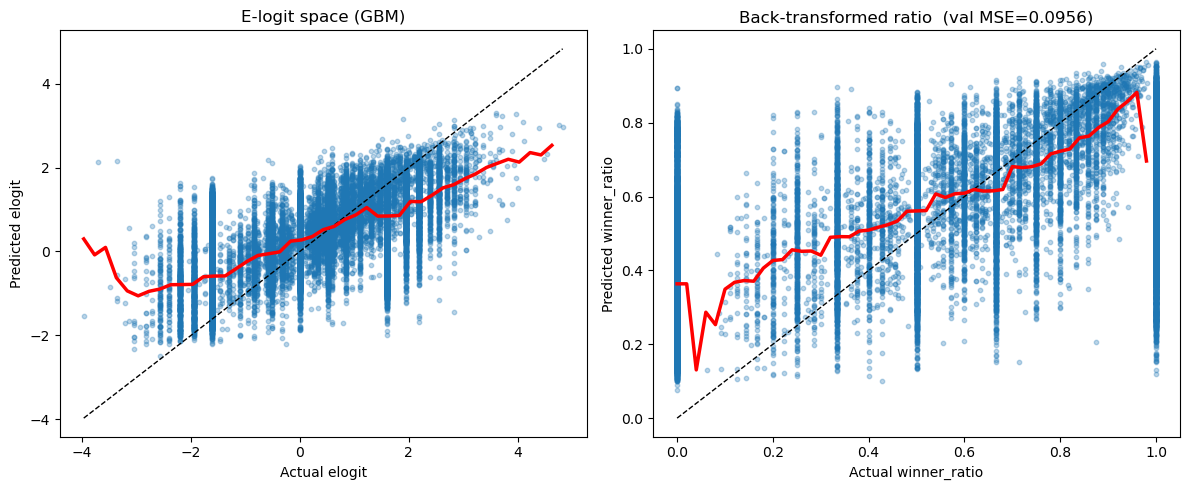

📦  saved → gbm_elogit_pipeline.pkl


In [158]:


trials_tr  = X_tr["politician_count"].to_numpy().clip(1)
trials_val = X_val["politician_count"].to_numpy().clip(1)
wins_tr    = np.round(y_tr_ratio  * trials_tr ).astype(int)
wins_val   = np.round(y_val_ratio * trials_val).astype(int)

elogit = lambda w,n: np.log(((w+0.5)/(n+1)) / (1-(w+0.5)/(n+1)))
y_tr_elog  = elogit(wins_tr,  trials_tr)
y_val_elog = elogit(wins_val, trials_val)

# ╭───────────────────────────────────────────────────────────────╮
# │ 2 · PREPROCESSING PIPELINE                                   │
# ╰───────────────────────────────────────────────────────────────╯
log1p = FunctionTransformer(np.log1p, validate=False)

from sklearn.impute import SimpleImputer

# Separate numeric transformer
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Politician count gets log1p, but still needs imputation
polcount_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", num_pipe, [c for c in num_cols if c!="politician_count"]),
    ("pc",  polcount_pipe, ["politician_count"])
], sparse_threshold=0.3)

# ╭───────────────────────────────────────────────────────────────╮
# │ 3 · MODEL (GBM) + GRID TUNING                                │
# ╰───────────────────────────────────────────────────────────────╯
gb_base = GradientBoostingRegressor(random_state=42)

grid = {
    "model__n_estimators":  [300, 600],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth":     [3, 4],
    "model__subsample":     [0.7, 1.0]
}

pipe = Pipeline([("pre", pre), ("model", gb_base)])

gs = GridSearchCV(pipe, grid, cv=3, n_jobs=-1,
                  scoring="neg_mean_squared_error", verbose=1)
print("⏳ fitting grid ...")
gs.fit(X_tr, y_tr_elog)
print("✅ best params:", gs.best_params_)

best = gs.best_estimator_

# ╭───────────────────────────────────────────────────────────────╮
# │ 4 · PREDICTIONS & METRICS                                    │
# ╰───────────────────────────────────────────────────────────────╯
elogit_hat_val = best.predict(X_val)
elogit_hat_tr  = best.predict(X_tr)

prob_val = 1/(1+np.exp(-elogit_hat_val))
prob_tr  = 1/(1+np.exp(-elogit_hat_tr))

mse_tr  = mean_squared_error(y_tr_ratio,  prob_tr)
mse_val = mean_squared_error(y_val_ratio, prob_val)
print(f"MSE (train / val) on ratio scale → {mse_tr:.4f} / {mse_val:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 5 · DIAGNOSTIC PLOTS                                         │
# ╰───────────────────────────────────────────────────────────────╯
def running_mean(x, y, w=0.4, step=0.1):
    g, m = [], []
    p = x.min()
    while p <= x.max():
        mask = (x >= p-w/2) & (x <= p+w/2)
        if mask.any():
            g.append(p)
            m.append(y[mask].mean())
        p += step
    return np.array(g), np.array(m)

fig, ax = plt.subplots(1,2, figsize=(12,5))

# --- elogit space
ax[0].scatter(y_val_elog, elogit_hat_val, s=10, alpha=.3)
ax[0].plot([y_val_elog.min(), y_val_elog.max()],
           [y_val_elog.min(), y_val_elog.max()], 'k--', lw=1)
g1, m1 = running_mean(y_val_elog, elogit_hat_val, w=0.6, step=0.2)
ax[0].plot(g1, m1, c="red", lw=2.5)
ax[0].set_title("E‑logit space (GBM)")
ax[0].set_xlabel("Actual elogit"); ax[0].set_ylabel("Predicted elogit")

# --- ratio space
ax[1].scatter(y_val_ratio, prob_val, s=10, alpha=.3)
ax[1].plot([0,1],[0,1],'k--',lw=1)
g2, m2 = running_mean(y_val_ratio, prob_val, w=0.06, step=0.02)
ax[1].plot(g2, m2, c="red", lw=2.5)
ax[1].set_title(f"Back‑transformed ratio  (val MSE={mse_val:.4f})")
ax[1].set_xlabel("Actual winner_ratio"); ax[1].set_ylabel("Predicted winner_ratio")

plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ 6 · SAVE PIPELINE                                            │
# ╰───────────────────────────────────────────────────────────────╯
joblib.dump(best, "gbm_elogit_pipeline.pkl")
print("📦  saved → gbm_elogit_pipeline.pkl")


### CLASSIFY+REGRESS MODEL:

# 

/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Distribution after thresholding: {2: 141979, 1: 25620, 0: 1806}
★ Total train MSE with prob‑threshold: 0.11926


/opt/anaconda3/envs/ds-nlp/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


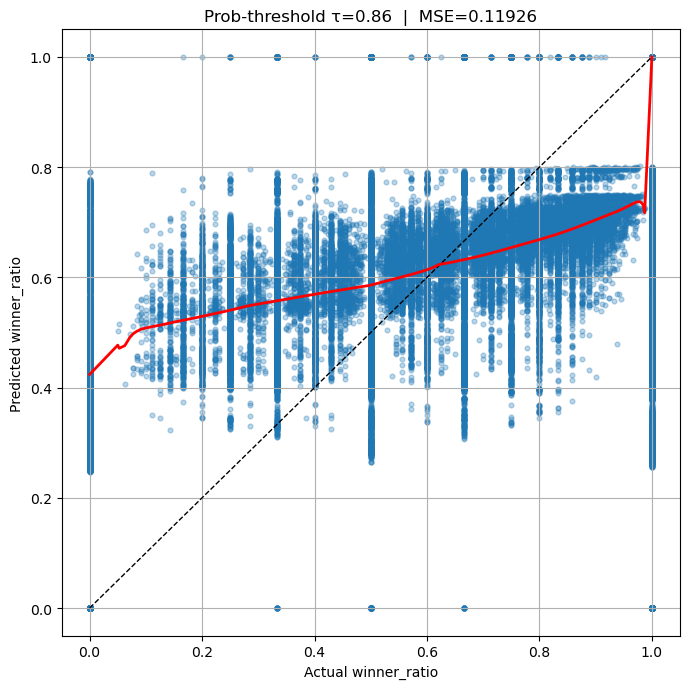

In [492]:
# ╭──────────────────── 0 · ONE‑TIME PREP  ────────────────────╮
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestRegressor
from sklearn.pipeline   import Pipeline
from sklearn.compose    import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute     import SimpleImputer
import numpy as np

# ─── COLUMN LISTS ──
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols += [c for c in X_train.columns if c.endswith("_le")]

num_cols = X_train.columns.difference(cat_cols).tolist()
num_cols_clean = [c for c in num_cols if c != "politician_count"]

# ─── PREPROCESSOR ── (must output DENSE for HistGB)
num_pipe = Pipeline([("imp", SimpleImputer(strategy="median")),
                     ("sc" , StandardScaler())])

pc_pipe  = Pipeline([("imp", SimpleImputer(strategy="median")),
                     ("log", FunctionTransformer(np.log1p, validate=False)),
                     ("sc" , StandardScaler())])

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", num_pipe, num_cols_clean),
    ("pc" , pc_pipe , ["politician_count"])
], sparse_threshold=0.0)            # force dense output

# ─── 1 · CLASSIFIER ───────────────────────────────────────────
y_class = np.where(y_train == 0, 0,
            np.where(y_train == 1, 1, 2))

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

log_multi = LogisticRegression(
                multi_class="multinomial",
                solver="lbfgs",
                C=4.0,
                class_weight={0:2, 1:2, 2:1},
                max_iter=2000,
                random_state=42)

clf_pipe = Pipeline([("pre", pre), ("clf", log_multi)])
clf_pipe.fit(X_train, y_class)

# ╭──────────────────── 0 · SETTINGS ─────────────────────────╮
tau = 0.86          # probability threshold for pure 0 / 1
# You can tune tau on a hold‑out set or via small grid: [0.85 … 0.97]

# ╭──────────────────── 1 · CLASS PROBABILITIES ──────────────╮
proba_train = clf_pipe.predict_proba(X_train)   # shape (n, 3)
# columns: [:,0] = P(class 0), [:,1] = P(class 1), [:,2] = P(other)

class_pred_train = np.full(len(X_train), 2, dtype=int)   # default “other”
class_pred_train[proba_train[:,0] >= tau] = 0
class_pred_train[proba_train[:,1] >= tau] = 1
# If both probs < tau  → stay class 2

# optional diagnostic:
print("Distribution after thresholding:",
      pd.Series(class_pred_train).value_counts().to_dict())

# ╭──────────────────── 2 · RE‑FIT RF (only if mask changes) ─╮
mask_other_train = class_pred_train == 2
X_other_train    = X_train.loc[mask_other_train]
y_other_train    = y_train.loc[mask_other_train]

rf_pipe = Pipeline([("pre", pre),
                    ("rf",  rf)])              # reuse same RF hyperparams
rf_pipe.fit(X_other_train, y_other_train)

# ╭──────────────────── 3 · COMBINED PREDICTIONS & MSE ───────╮
y_hat_train = np.zeros_like(y_train, dtype=float)
y_hat_train[class_pred_train == 0] = 0.0
y_hat_train[class_pred_train == 1] = 1.0
y_hat_train[mask_other_train]      = rf_pipe.predict(X_other_train)

total_mse = mean_squared_error(y_train, y_hat_train)
print("★ Total train MSE with prob‑threshold:",
      round(total_mse, 5))

# ╭──────────────────── 4 · PLOT UPDATED RESULTS ─────────────╮
from statsmodels.nonparametric.smoothers_lowess import lowess
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_train, y_hat_train, alpha=.3, s=12)
ax.plot([0,1],[0,1],'k--',lw=1)
trend = lowess(y_hat_train, y_train, frac=0.2)
ax.plot(trend[:,0], trend[:,1], c='red', lw=2)
ax.set_xlabel("Actual winner_ratio")
ax.set_ylabel("Predicted winner_ratio")
ax.set_title(f"Prob‑threshold τ={tau}  |  MSE={round(total_mse,5)}")
ax.grid(True); plt.tight_layout(); plt.show()



τ=0.85  →  val MSE=0.12228
τ=0.86  →  val MSE=0.12092
τ=0.87  →  val MSE=0.12149
τ=0.89  →  val MSE=0.12208
τ=0.90  →  val MSE=0.12365
τ=0.91  →  val MSE=0.12557
τ=0.92  →  val MSE=0.12729
τ=0.93  →  val MSE=0.12922
τ=0.95  →  val MSE=0.13186
τ=0.96  →  val MSE=0.13571
τ=0.97  →  val MSE=0.14021

★ Best τ = 0.86  (val MSE = 0.12092)


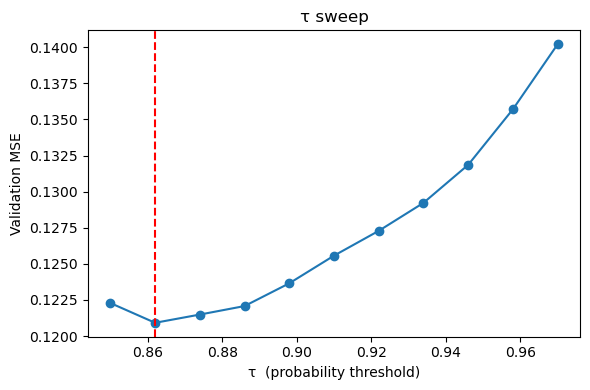

In [489]:
# ╭────────────────── 0 · HOLD‑OUT SPLIT ─────────────────────╮
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.20, random_state=42)

# Re‑fit RF on *training* portion once; classifier already fitted
proba_tr  = clf_pipe.predict_proba(X_tr)
class_tr  = np.full(len(X_tr), 2, dtype=int)
# temp τ just to define RF‑training rows (will re‑mask later):
class_tr[np.argmax(proba_tr,1)==0] = 0
class_tr[np.argmax(proba_tr,1)==1] = 1
mask_other_tr = class_tr == 2

rf_pipe.fit(X_tr.loc[mask_other_tr], y_tr.loc[mask_other_tr])  # base RF

# ╭────────────────── 1 · GRID SEARCH OVER τ ─────────────────╮
taus = np.linspace(0.85, 0.97, 11)   # 0.85, 0.86, …, 0.97
val_mse = []

for tau in taus:
    # --- classify validation rows with τ ---------------------
    proba_val = clf_pipe.predict_proba(X_val)
    class_val = np.full(len(X_val), 2, dtype=int)
    class_val[proba_val[:,0] >= tau] = 0
    class_val[proba_val[:,1] >= tau] = 1

    # --- predictions ----------------------------------------
    y_hat_val = np.zeros_like(y_val, dtype=float)
    y_hat_val[class_val == 0] = 0.0
    y_hat_val[class_val == 1] = 1.0
    mask_other_val = class_val == 2
    y_hat_val[mask_other_val] = rf_pipe.predict(X_val.loc[mask_other_val])

    mse = mean_squared_error(y_val, y_hat_val)
    val_mse.append(mse)
    print(f"τ={tau:.2f}  →  val MSE={mse:.5f}")

# ╭────────────────── 2 · BEST τ & PLOT ──────────────────────╮
best_idx = int(np.argmin(val_mse))
best_tau = taus[best_idx]
print(f"\n★ Best τ = {best_tau:.2f}  (val MSE = {val_mse[best_idx]:.5f})")

plt.figure(figsize=(6,4))
plt.plot(taus, val_mse, marker='o')
plt.axvline(best_tau, color='red', ls='--')
plt.xlabel("τ  (probability threshold)")
plt.ylabel("Validation MSE")
plt.title("τ sweep")
plt.tight_layout(); plt.show()


# SiGMOID On TARGET:

Logit‑target HistGB  validation MSE = 0.11632


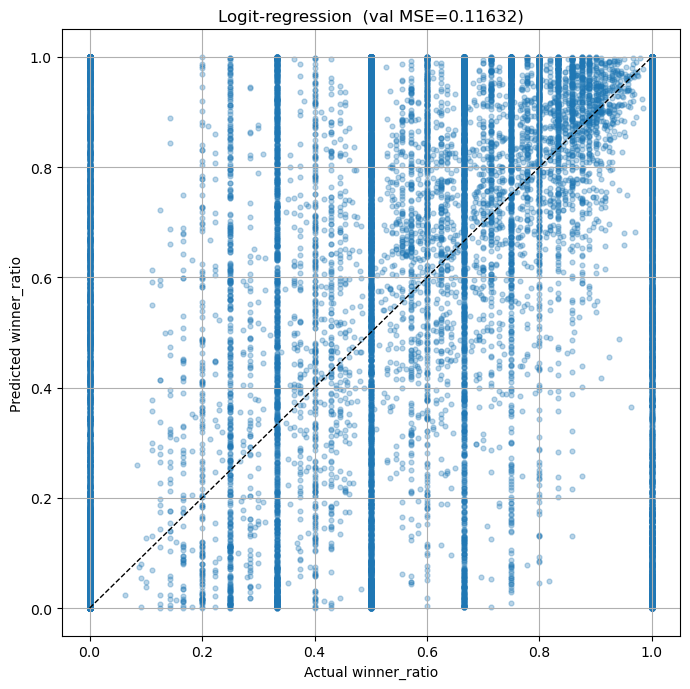

In [497]:
# ╭──────────────────── 0 · IMPORTS ──────────────────────────╮
import numpy as np, pandas as pd
from sklearn.compose      import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute       import SimpleImputer
from sklearn.pipeline     import Pipeline
from sklearn.ensemble     import HistGradientBoostingRegressor
from sklearn.metrics      import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ╭──────────────────── 1 · TARGET TRANSFORMS ────────────────╮
eps = 1e-4
logit  = lambda y: np.log(y/(1-y))
sigmoid = lambda z: 1/(1+np.exp(-z))

# ╭──────────────────── 2 · DATA & SPLIT ─────────────────────╮
X      = train_bkp.drop(columns=["winner_ratio"]).copy()
y_raw  = train_bkp["winner_ratio"].clip(eps, 1-eps)   # avoid 0 / 1
y_log  = logit(y_raw)

X_tr, X_val, y_tr, y_val = train_test_split(
        X, y_log, test_size=0.20, random_state=42)

# ╭──────────────────── 3 · PREPROCESSOR ─────────────────────╮
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols += [c for c in X.columns if c.endswith("_le")]

num_cols = X.columns.difference(cat_cols).tolist()
num_cols_clean = [c for c in num_cols if c != "politician_count"]

num_pipe = Pipeline([("imp", SimpleImputer(strategy="median")),
                     ("sc" , StandardScaler())])
pc_pipe  = Pipeline([("imp", SimpleImputer(strategy="median")),
                     ("log", FunctionTransformer(np.log1p, validate=False)),
                     ("sc" , StandardScaler())])

pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore",
                              sparse_output=False), cat_cols),
        ("num", num_pipe, num_cols_clean),
        ("pc" , pc_pipe , ["politician_count"])
], sparse_threshold=0.0)

# ╭──────────────────── 4 · REGRESSOR (logit space) ──────────╮
reg = HistGradientBoostingRegressor(
        learning_rate=0.05,
        max_depth=4,
        max_iter=600,
        l2_regularization=1.0,
        random_state=42)

pipe = Pipeline([("pre", pre), ("reg", reg)])
pipe.fit(X_tr, y_tr)

# ╭──────────────────── 5 · EVALUATION ───────────────────────╮
y_pred_val_log = pipe.predict(X_val)
y_pred_val     = sigmoid(y_pred_val_log)    # back to [0,1]
mse_val        = mean_squared_error(np.exp(y_val)/(1+np.exp(y_val)),  # invert y_tr too
                                    y_pred_val)
print(f"Logit‑target HistGB  validation MSE = {mse_val:.5f}")

# ╭──────────────────── 6 · PLOT ─────────────────────────────╮
plt.figure(figsize=(7,7))
plt.scatter(np.exp(y_val)/(1+np.exp(y_val)), y_pred_val,
            alpha=.3, s=12)
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"Logit‑regression  (val MSE={mse_val:.5f})")
plt.grid(True); plt.tight_layout(); plt.show()

# # ╭──────────────────── 7 · TEST PREDICTIONS ─────────────────╮
# y_pred_test_log = pipe.predict(test_df)      # test_df pre‑defined
# y_pred_test     = sigmoid(y_pred_test_log)
# # y_pred_test is your final [0,1] prediction vector


Best k = 0.42105263157894735    val MSE = 0.1106


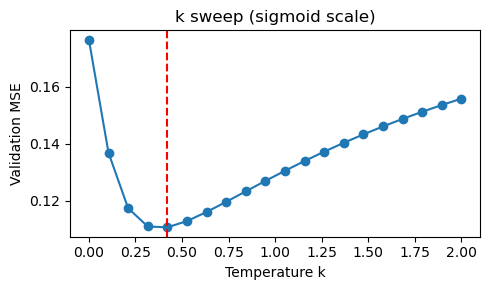

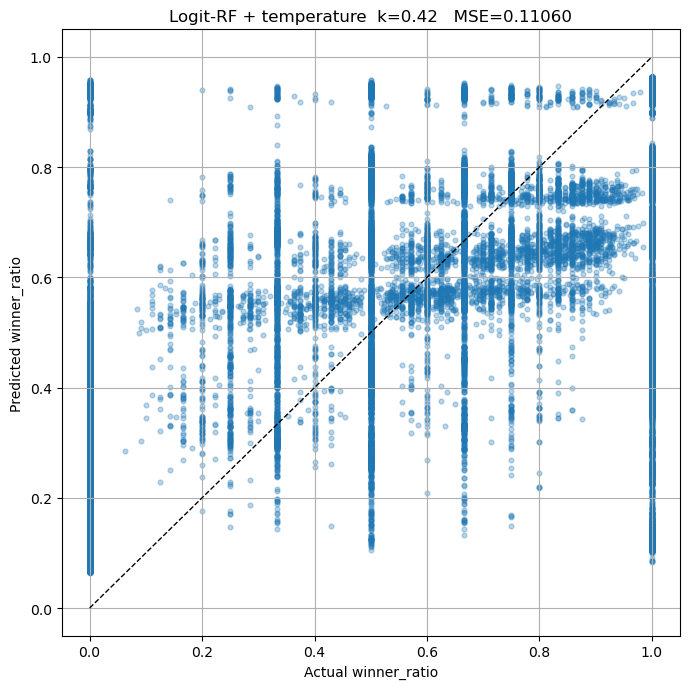

In [500]:
# ─── 0 · collect logits once ─────────────────────────────────
y_pred_val_log = pipe.predict(X_val)          # logits
y_val_raw      = sigmoid(y_val)              # true ratio back‑transform

# ─── 1 · grid search temperature k ───────────────────────────
ks   = np.linspace(0.0, 2.0, 20)    # 0.0, 0.1, …, 2.0
mse_ = []
for k in ks:
    y_hat = sigmoid(k * y_pred_val_log)
    mse_.append(mean_squared_error(y_val_raw, y_hat))

best_k = ks[int(np.argmin(mse_))]
print("Best k =", best_k, "   val MSE =", round(min(mse_), 5))

# optional plot k vs MSE
plt.figure(figsize=(5,3))
plt.plot(ks, mse_, marker='o')
plt.axvline(best_k, color='red', ls='--')
plt.xlabel("Temperature k")
plt.ylabel("Validation MSE")
plt.title("k sweep (sigmoid scale)")
plt.tight_layout(); plt.show()

# ─── 2 · final scatter with best k ───────────────────────────
y_hat_best = sigmoid(best_k * y_pred_val_log)
plt.figure(figsize=(7,7))
plt.scatter(y_val_raw, y_hat_best, alpha=.3, s=12)
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"Logit‑RF + temperature  k={best_k:.2f}   MSE={min(mse_):.5f}")
plt.grid(True); plt.tight_layout(); plt.show()


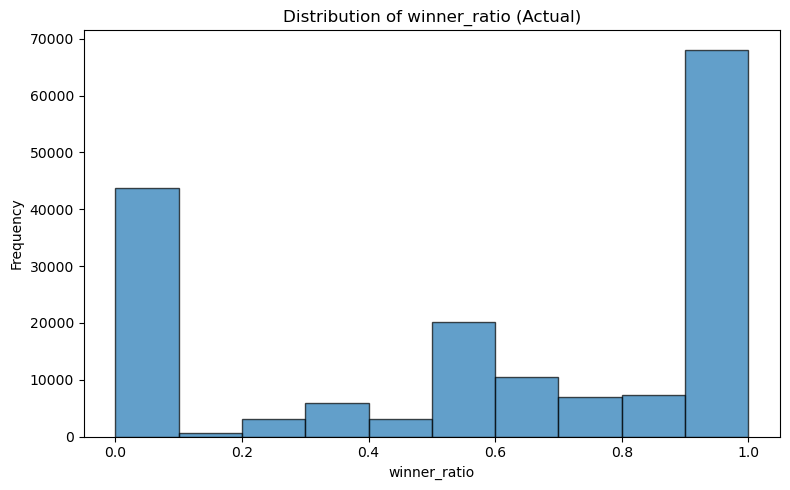

In [502]:
winner_ratio = train_bkp["winner_ratio"]

plt.figure(figsize=(8,5))
plt.hist(winner_ratio, bins=10, edgecolor="k", alpha=0.7)
plt.title("Distribution of winner_ratio (Actual)")
plt.xlabel("winner_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Random‑Forest (logit target)  validation MSE = 0.12867


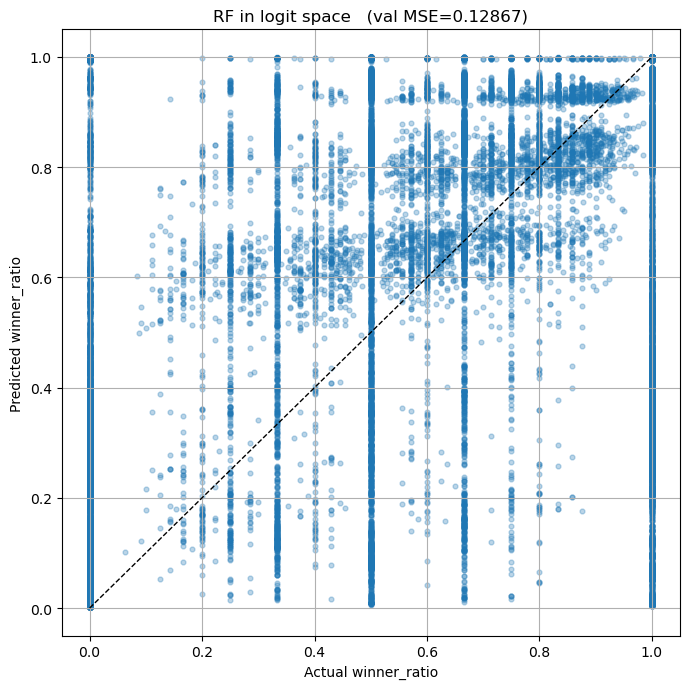

NameError: name 'test_df' is not defined

In [ ]:
# ╭──────────────────── 0 · IMPORTS ──────────────────────────╮
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute        import SimpleImputer
from sklearn.pipeline      import Pipeline
from sklearn.ensemble      import RandomForestRegressor
from sklearn.metrics       import mean_squared_error
from sklearn.model_selection import train_test_split

# ╭──────────────────── 1 · LOGIT / SIGMOID ──────────────────╮
eps     = 1e-4
logit   = lambda y: np.log(y/(1-y))
sigmoid = lambda z: 1/(1+np.exp(-z))

# ╭──────────────────── 2 · DATA PREP  ───────────────────────╮
X      = train_bkp.drop(columns=["winner_ratio"]).copy()
y_raw  = train_bkp["winner_ratio"].clip(eps, 1-eps)
y_log  = logit(y_raw)

X_tr, X_val, y_tr, y_val = train_test_split(
        X, y_log, test_size=0.20, random_state=42)

# ╭──────────────────── 3 · PREPROCESSOR ─────────────────────╮
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols += [c for c in X.columns if c.endswith("_le")]

num_cols = X.columns.difference(cat_cols).tolist()
num_cols_clean = [c for c in num_cols if c != "politician_count"]

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc" , StandardScaler())
])

pc_pipe  = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("sc" , StandardScaler())
])

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore",
                          sparse_output=False), cat_cols),
    ("num", num_pipe, num_cols_clean),
    ("pc" , pc_pipe , ["politician_count"])
], sparse_threshold=0.0)

# ╭──────────────────── 4 · RANDOM FOREST REGRESSOR ──────────╮
rf = RandomForestRegressor(
        n_estimators=600,
        max_depth=6,
        min_samples_leaf=5,
        max_features="sqrt",
        n_jobs=-1,
        random_state=42,
        oob_score=False)

pipe = Pipeline([("pre", pre), ("rf", rf)])
pipe.fit(X_tr, y_tr)

# ╭──────────────────── 5 · VALIDATION MSE ───────────────────╮
y_pred_val_log = pipe.predict(X_val)
y_pred_val     = sigmoid(y_pred_val_log)
y_val_raw      = sigmoid(y_val)          # invert ground‑truth back to ratio

mse_val = mean_squared_error(y_val_raw, y_pred_val)
print(f"Random‑Forest (logit target)  validation MSE = {mse_val:.5f}")

# ╭──────────────────── 6 · SCATTER PLOT ─────────────────────╮
plt.figure(figsize=(7,7))
plt.scatter(y_val_raw, y_pred_val, alpha=.3, s=12)
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"RF in logit space   (val MSE={mse_val:.5f})")
plt.grid(True); plt.tight_layout(); plt.show()

# # ╭──────────────────── 7 · PREDICT ON TEST ──────────────────╮
# y_pred_test_log = pipe.predict(test_df)       # test_df = your unseen set
# y_pred_test     = sigmoid(y_pred_test_log)
# y_pred_test is ready for submission / downstream use


# ARSCING_SQRT_HGB

Arcsin‑sqrt HistGB  validation MSE = 0.09368


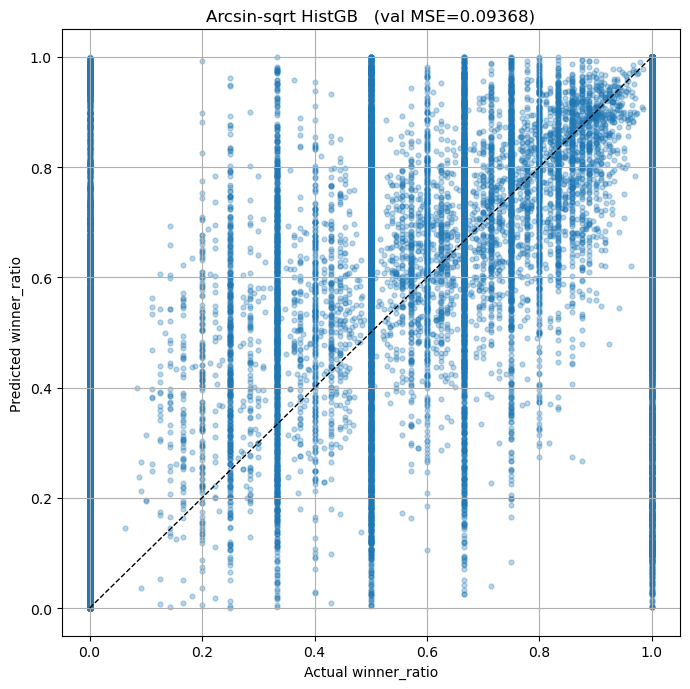

In [503]:
# ╭──────────────────── 0 · IMPORTS ──────────────────────────╮
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute        import SimpleImputer
from sklearn.pipeline      import Pipeline
from sklearn.ensemble      import HistGradientBoostingRegressor
from sklearn.metrics       import mean_squared_error
from sklearn.model_selection import train_test_split

# ╭──────────────────── 1 · TRANSFORMS ───────────────────────╮
eps = 1e-4
arcsin_sqrt   = lambda y: np.arcsin( np.sqrt( y.clip(eps, 1-eps) ) )
inverse_arcsin_sqrt = lambda t: np.sin(t)**2

# ╭──────────────────── 2 · DATA PREP ────────────────────────╮
X      = train_bkp.drop(columns=["winner_ratio"]).copy()
y_raw  = train_bkp["winner_ratio"]
y_trsf = arcsin_sqrt(y_raw)

X_tr, X_val, y_tr, y_val = train_test_split(
        X, y_trsf, test_size=0.20, random_state=42)

# ╭──────────────────── 3 · PREPROCESSOR ─────────────────────╮
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols += [c for c in X.columns if c.endswith("_le")]

num_cols = X.columns.difference(cat_cols).tolist()
num_cols_clean = [c for c in num_cols if c != "politician_count"]

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc" , StandardScaler())
])

pc_pipe  = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("sc" , StandardScaler())
])

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore",
                          sparse_output=False), cat_cols),
    ("num", num_pipe, num_cols_clean),
    ("pc" , pc_pipe , ["politician_count"])
], sparse_threshold=0.0)

# ╭──────────────────── 4 · HISTGB REGRESSOR ─────────────────╮
hgb = HistGradientBoostingRegressor(
        learning_rate=0.05,
        max_iter=600,
        max_depth=4,
        l2_regularization=1.0,
        random_state=42)

pipe = Pipeline([("pre", pre), ("hgb", hgb)])
pipe.fit(X_tr, y_tr)

# ╭──────────────────── 5 · VALIDATION PREDICTIONS ───────────╮
y_pred_val_trsf = pipe.predict(X_val)
y_pred_val      = inverse_arcsin_sqrt(y_pred_val_trsf)
y_val_raw       = inverse_arcsin_sqrt(y_val)

mse_val = mean_squared_error(y_val_raw, y_pred_val)
print(f"Arcsin‑sqrt HistGB  validation MSE = {mse_val:.5f}")

# ╭──────────────────── 6 · SCATTER PLOT ─────────────────────╮
plt.figure(figsize=(7,7))
plt.scatter(y_val_raw, y_pred_val, alpha=.3, s=12)
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"Arcsin‑sqrt HistGB   (val MSE={mse_val:.5f})")
plt.grid(True); plt.tight_layout(); plt.show()

# ╭──────────────────── 7 · TEST PREDICTIONS ─────────────────╮
# y_pred_test_trsf = pipe.predict(test_df)    # (unseen data)
# y_pred_test = inverse_arcsin_sqrt(y_pred_test_trsf)
# ready for final prediction


# OLD MODEL in V03:

In [2]:
train_bkp=pd.read_csv("train_bkp.csv")
test_bkp=pd.read_csv("test_bkp.csv")


✅ RandomForest:
   Train MSE: 0.10514
   Val   MSE: 0.10519
📦  saved → randomforest_quick_pipeline.pkl


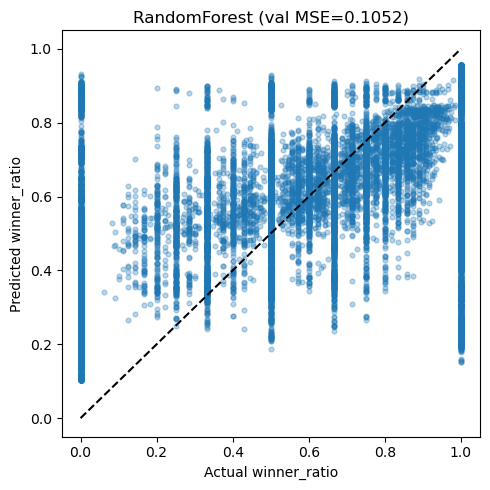


✅ XGBoost:
   Train MSE: 0.08015
   Val   MSE: 0.08538
📦  saved → xgboost_quick_pipeline.pkl


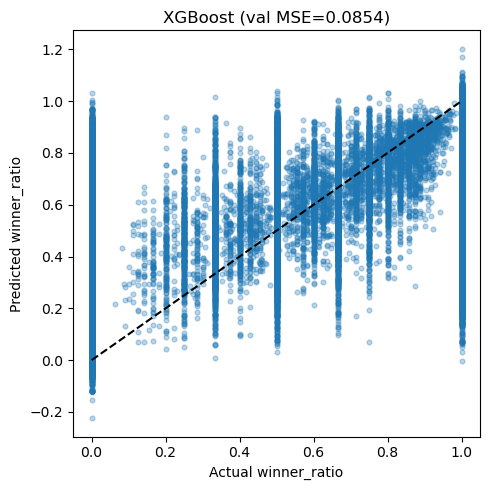


✅ CatBoost:
   Train MSE: 0.08794
   Val   MSE: 0.08863
📦  saved → catboost_quick_pipeline.pkl


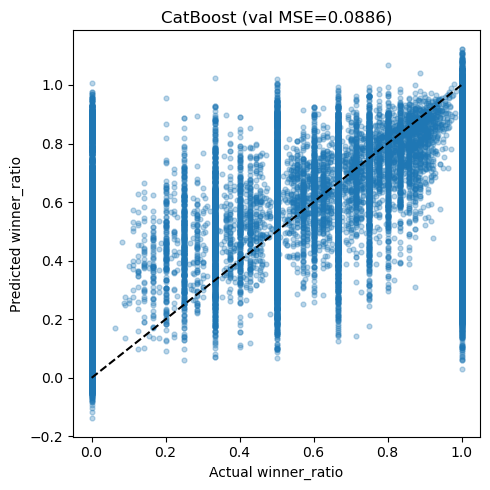

In [5]:
# ╭──────────────────── 0 · IMPORTS ──────────────────────────╮
import time, joblib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection   import train_test_split
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.impute            import SimpleImputer
from sklearn.metrics           import mean_squared_error

from sklearn.ensemble          import RandomForestRegressor
from xgboost                   import XGBRegressor
from catboost                  import CatBoostRegressor

# ╭──────────────────── 1 · DATA ─────────────────────────────╮
train = train_bkp.copy()

y = train.pop("winner_ratio")
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ╭──────────────────── 2 · PREPROCESSOR ─────────────────────╮
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", "passthrough", num_cols)
], sparse_threshold=0.0)

# ╭──────────────────── 3 · MODELS (Good Defaults) ────────────╮
rf = RandomForestRegressor(
        n_estimators=600,
        max_depth=8,
        min_samples_split=5,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
)

xgb = XGBRegressor(
        n_estimators=600,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1,
        random_state=42
)

cb = CatBoostRegressor(
        iterations=600,
        depth=6,
        learning_rate=0.05,
        subsample=0.8,
        l2_leaf_reg=3,
        loss_function="RMSE",
        random_seed=42,
        verbose=0
)

# ╭──────────────────── 4 · TRAIN + EVALUATE FUNCTION ─────────╮
def quick_train(model, model_name):
    pipe = Pipeline([
        ("pre", pre),
        ("model", model)
    ])
    pipe.fit(X_tr, y_tr)

    y_pred_tr  = pipe.predict(X_tr)
    y_pred_val = pipe.predict(X_val)

    mse_tr  = mean_squared_error(y_tr, y_pred_tr)
    mse_val = mean_squared_error(y_val, y_pred_val)

    print(f"\n✅ {model_name}:")
    print(f"   Train MSE: {mse_tr:.5f}")
    print(f"   Val   MSE: {mse_val:.5f}")

    # Save model
    fname = f"{model_name.lower()}_quick_pipeline.pkl"
    joblib.dump(pipe, fname)
    print(f"📦  saved → {fname}")

    # Diagnostic plot
    plt.figure(figsize=(5,5))
    plt.scatter(y_val, y_pred_val, alpha=0.3, s=12)
    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("Actual winner_ratio")
    plt.ylabel("Predicted winner_ratio")
    plt.title(f"{model_name} (val MSE={mse_val:.4f})")
    plt.tight_layout()
    plt.show()

# ╭──────────────────── 5 · RUN ALL ──────────────────────────╮
quick_train(rf, "RandomForest")
quick_train(xgb, "XGBoost")
quick_train(cb, "CatBoost")


## Experiment 2

In [144]:
train = train_bkp.copy()

[   0.0s] Preparing target & predictors
[   0.0s] Splitting 80/20 train–val
[   0.0s] Building preprocessing pipeline
[   0.0s] Fitting Elastic‑Net CV …


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[   3.9s] Model fit complete
[   3.9s] Validation MSE = 0.043029
   best α       = 0.0001
   best ℓ₁‑ratio = 0.5


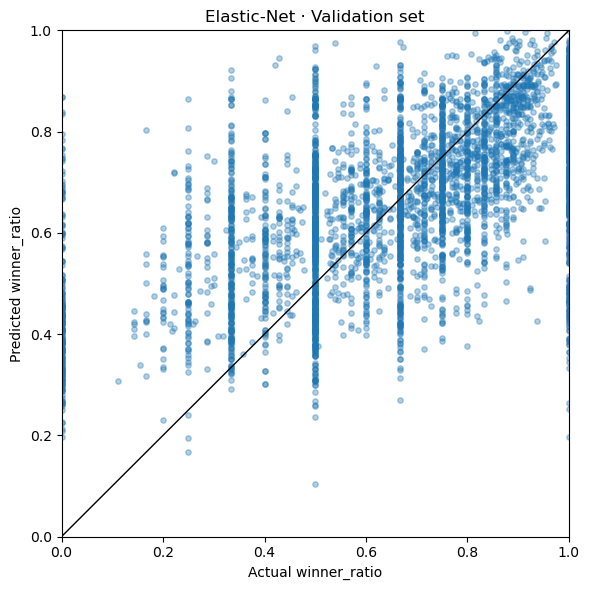

[   4.2s] Finished


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV
from sklearn.metrics           import mean_squared_error
from time import perf_counter

# ---------------------------------------------------------
# 0 · basic timing helper
# ---------------------------------------------------------
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.1f}s] {msg}")

# ---------------------------------------------------------
# 1 · target / predictors
# ---------------------------------------------------------
tick("Preparing target & predictors")
y = train.pop("winner_ratio")
X = train

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

# ---------------------------------------------------------
# 3 · preprocessing + model
# ---------------------------------------------------------
tick("Building preprocessing pipeline")
pre = ColumnTransformer(
      [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
       ("num", StandardScaler(),                     num_cols)],
      sparse_threshold=0.3)

enet = ElasticNetCV(
        l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        alphas=np.logspace(-4, 1, 30),
        cv=15,
        max_iter=20_000,
        n_jobs=-1,
        verbose=1,          # <‑‑ prints CV progress
        random_state=42)

pipe = Pipeline([("pre", pre), ("enet", enet)])

# ---------------------------------------------------------
# 4 · fit
# ---------------------------------------------------------
tick("Fitting Elastic‑Net CV …")
pipe.fit(X_tr, y_tr)
tick("Model fit complete")

# ---------------------------------------------------------
# 5 · evaluate
# ---------------------------------------------------------
y_pred = pipe.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred)
tick(f"Validation MSE = {mse_val:.6f}")
print(f"   best α       = {pipe.named_steps['enet'].alpha_:.4f}")
print(f"   best ℓ₁‑ratio = {pipe.named_steps['enet'].l1_ratio_}")

# ---------------------------------------------------------
# 6 · diagnostic plot
# ---------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.35, s=15)
lim = [0, 1]
plt.plot(lim, lim, c="k", lw=1)
plt.xlim(lim); plt.ylim(lim)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title("Elastic‑Net · Validation set")
plt.tight_layout()
plt.show()
tick("Finished")


In [146]:
from sklearn.linear_model import ElasticNet

# ----------------------------------------------
# 1 · Extract full feature names after OHE + scale
# ----------------------------------------------
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
num = pipe.named_steps["pre"].named_transformers_["num"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
full_feature_names = np.concatenate([cat_feature_names, num_cols])

# ----------------------------------------------
# 2 · Get coefficients
# ----------------------------------------------
coef = pipe.named_steps["enet"].coef_

feature_importance = pd.Series(coef, index=full_feature_names)
important_feats = feature_importance[feature_importance.abs() > 1e-4].sort_values(ascending=False)

print("Top features:\n", important_feats.head(10))

# ----------------------------------------------
# 3 · Rebuild pipeline using only top features
# ----------------------------------------------
top_feats = important_feats.index.tolist()

# Build a new transformer for only these
pre_reduced = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith("state_") or f.startswith("contributor_type_") or f.startswith("general_sector_new_") for f in top_feats)]),
    ("num", StandardScaler(), [f for f in top_feats if f in num_cols])
], sparse_threshold=0.3)

enet_final = ElasticNet(
    alpha=pipe.named_steps["enet"].alpha_,
    l1_ratio=pipe.named_steps["enet"].l1_ratio_,
    max_iter=20000
)

pipe_reduced = Pipeline([("pre", pre_reduced), ("enet", enet_final)])

# ----------------------------------------------
# 4 · Refit and evaluate
# ----------------------------------------------
pipe_reduced.fit(X_tr, y_tr)
y_pred_reduced = pipe_reduced.predict(X_val)
mse_reduced = mean_squared_error(y_val, y_pred_reduced)

print(f"\n📉 Refined model MSE: {mse_reduced:.6f} using {len(top_feats)} features")


Top features:
 politician_incumbency_ratio_logit      0.340366
politician_incumbency_ratio_is_zero    0.149187
state_NY                               0.062294
state_CO                               0.047494
state_OH                               0.029758
state_MA                               0.027117
contributor_type_Non-Individual        0.026369
state_RI                               0.022759
state_NC                               0.022208
politician_challenger_ratio_is_one     0.021979
dtype: float64

📉 Refined model MSE: 0.043030 using 56 features


In [147]:
important_feats

politician_incumbency_ratio_logit                  0.340366
politician_incumbency_ratio_is_zero                0.149187
state_NY                                           0.062294
state_CO                                           0.047494
state_OH                                           0.029758
state_MA                                           0.027117
contributor_type_Non-Individual                    0.026369
state_RI                                           0.022759
state_NC                                           0.022208
politician_challenger_ratio_is_one                 0.021979
state_NM                                           0.021192
state_WA                                           0.019391
state_all_pr                                       0.017596
general_sector_new_Construction & Manufacturing    0.015882
politician_open_pos_ratio_is_one                   0.015214
state_CT                                           0.015022
state_all_comm                          

In [148]:
train = train_bkp.copy()


[   0.0s] 🔍 CatBoost: grid‑search
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[ 975.8s]    best params: {'model__depth': 6, 'model__iterations': 1000, 'model__l2_leaf_reg': 5, 'model__learning_rate': 0.03, 'model__rsm': 0.6, 'model__subsample': 0.8}
[ 976.1s]    full MSE (train/val) = 0.0337 / 0.0404
[ 976.1s]    selected top 40 features
[ 978.4s]    reduced MSE (train/val) = 0.0338 / 0.0402
[ 978.4s]    pipeline saved → catboost_pipeline.pkl



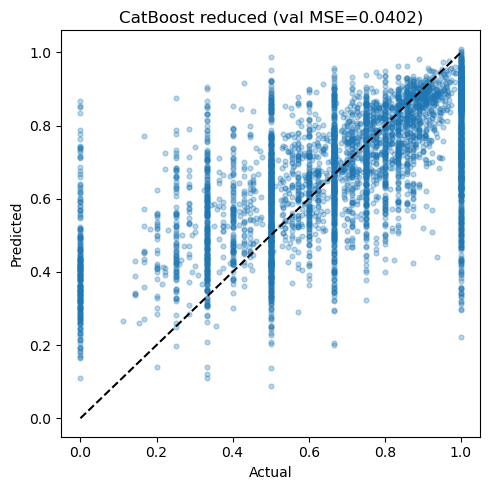

In [149]:
# ==================================================================================
# 0 · PREP & IMPORTS
# ==================================================================================
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection   import train_test_split, GridSearchCV
from sklearn.preprocessing     import OneHotEncoder
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error

from sklearn.ensemble          import RandomForestRegressor
from xgboost                   import XGBRegressor
import catboost
from catboost import CatBoostRegressor

# assume `train_bkp` is your original DataFrame
train = train_bkp.copy()

# ─────────────────────────────────────────────────────────────────────────────
# 1 · SPLIT OUT TARGET & PREDICTORS
# ─────────────────────────────────────────────────────────────────────────────
y = train.pop("winner_ratio")
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# timing helper
t0 = time.perf_counter()
tick = lambda msg: print(f"[{time.perf_counter()-t0:6.1f}s] {msg}")

# ==================================================================================
# 2 · GENERIC BUILD‑AND‑REFIT FUNCTION
# ==================================================================================
def tree_workflow(name, base_estimator, param_grid, top_k=40):
    tick(f"🔍 {name}: grid‑search")
    pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough",                     num_cols),
    ], sparse_threshold=0.3)

    pipe = Pipeline([("pre", pre), ("model", base_estimator)])

    search = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_tr, y_tr)

    best_pipe  = search.best_estimator_
    best_model = best_pipe.named_steps["model"]
    tick(f"   best params: {search.best_params_}")

    # full‑model metrics
    mse_tr_full  = mean_squared_error(y_tr, best_pipe.predict(X_tr))
    mse_val_full = mean_squared_error(y_val, best_pipe.predict(X_val))
    tick(f"   full MSE (train/val) = {mse_tr_full:.4f} / {mse_val_full:.4f}")

    # feature importances
    ohe = best_pipe.named_steps["pre"].named_transformers_["cat"]
    feat_names = np.concatenate([ohe.get_feature_names_out(cat_cols), num_cols])
    importances = best_model.feature_importances_
    imp_series  = pd.Series(importances, index=feat_names).abs().sort_values(ascending=False)

    top_feats = imp_series.head(top_k).index.tolist()
    tick(f"   selected top {top_k} features")

    # retrain on subset
    pre_reduced = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith(c+"_") for f in top_feats)]),
        ("num", "passthrough", [f for f in top_feats if f in num_cols]),
    ], sparse_threshold=0.3)

    model_reduced = base_estimator.__class__(**best_model.get_params())
    pipe_reduced  = Pipeline([("pre", pre_reduced), ("model", model_reduced)])
    pipe_reduced.fit(X_tr, y_tr)

    mse_tr_red  = mean_squared_error(y_tr,  pipe_reduced.predict(X_tr))
    mse_val_red = mean_squared_error(y_val, pipe_reduced.predict(X_val))
    tick(f"   reduced MSE (train/val) = {mse_tr_red:.4f} / {mse_val_red:.4f}")

    # save pipeline
    fname = f"{name.lower()}_pipeline.pkl"
    joblib.dump(pipe_reduced, fname)
    tick(f"   pipeline saved → {fname}\n")

    # diagnostic plot
    plt.figure(figsize=(5,5))
    plt.scatter(y_val, pipe_reduced.predict(X_val), alpha=0.3, s=12)
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"{name} reduced (val MSE={mse_val_red:.4f})")
    plt.xlabel("Actual"); plt.ylabel("Predicted")
    plt.tight_layout(); plt.show()


# ==================================================================================
# 5 · CATBOOST
# ==================================================================================
cb_params = {
    "model__iterations":    [200, 500, 1000],
    "model__depth":         [4, 6, 8],
    "model__learning_rate": [0.01, 0.03, 0.05],
    "model__l2_leaf_reg":   [1, 3, 5],
    "model__subsample":     [0.6, 0.8, 1.0],
    "model__rsm":           [0.6, 0.8, 1.0]
}

tree_workflow(
    "CatBoost",
    CatBoostRegressor(loss_function="RMSE", random_seed=42, verbose=0),
    cb_params,
    top_k=40
)


[ 978.7s] 🔍 RandomForest: grid‑search
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/opt/anaconda3/envs/tf_macos/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[1408.2s]    best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 300}
[1408.5s]    full MSE (train/val) = 0.0303 / 0.0411
[1408.5s]    selected top 40 features
[1410.9s]    reduced MSE (train/val) = 0.0299 / 0.0411
[1411.0s]    pipeline saved → randomforest_pipeline.pkl



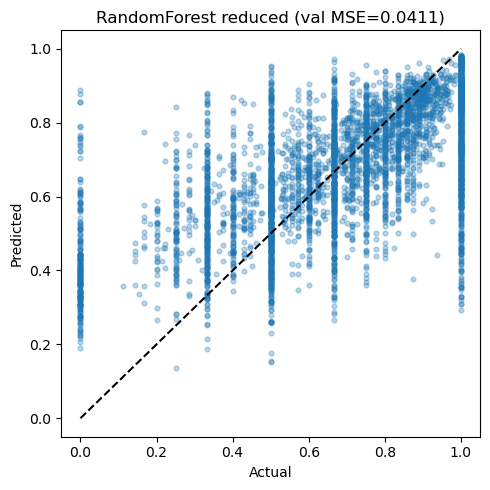

[1411.2s] 🔍 XGBoost: grid‑search
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[1918.4s]    best params: {'model__colsample_bytree': 0.7, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 800, 'model__subsample': 0.7}
[1918.4s]    full MSE (train/val) = 0.0347 / 0.0404
[1918.4s]    selected top 40 features
[1919.9s]    reduced MSE (train/val) = 0.0347 / 0.0404
[1919.9s]    pipeline saved → xgboost_pipeline.pkl



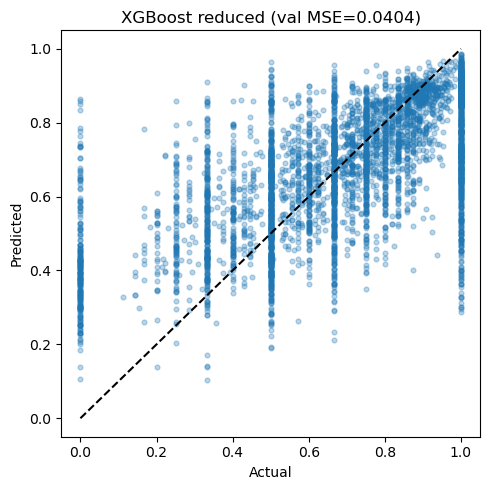

In [150]:

# ==================================================================================
# 3 · RANDOM FOREST
# ==================================================================================
rf_params = {
    "model__n_estimators":     [300, 500, 800],
    "model__max_depth":        [None, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features":     ["sqrt", "log2", 0.6]
}

tree_workflow(
    "RandomForest",
    RandomForestRegressor(n_jobs=-1, random_state=42),
    rf_params,
    top_k=40
)


# ==================================================================================
# 4 · XGBOOST
# ==================================================================================
xgb_params = {
    "model__n_estimators":     [300, 500, 800],
    "model__learning_rate":    [0.01, 0.05, 0.1],
    "model__max_depth":        [3, 5, 7],
    "model__subsample":        [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__gamma":            [0, 0.5, 1.0]
}

tree_workflow(
    "XGBoost",
    XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42),
    xgb_params,
    top_k=40
)




In [71]:
train = train_bkp.copy()

In [ ]:
cols = ['winner_ratio']
plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):

In [75]:
train.winner_ratio.value_counts().to_clipboard()

In [ ]:
train_bkp = train.copy()

In [76]:

y = train.pop(target).astype("float32")
X = train.copy()
# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

eps = 1e-6

y_tr_logit  = np.log((y_tr  + eps) / (1 - y_tr  + eps)).astype("float32")


[7847.9s] Splitting 80/20 train–val


In [79]:
train = train_bkp.copy()

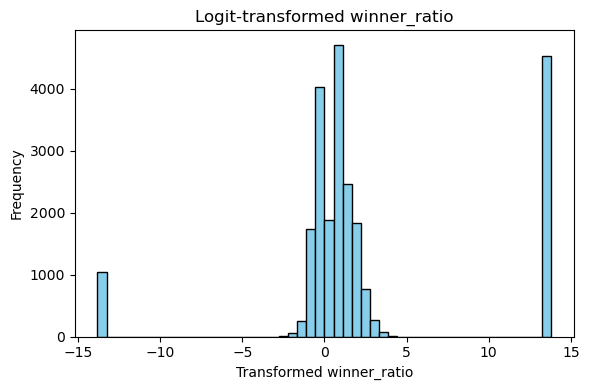

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Small epsilon to avoid log(0) or log(∞)
eps = 1e-6

# Apply logit transformation
train["winner_ratio_logit"] = np.log((train["winner_ratio"] + eps) / (1 - train["winner_ratio"] + eps))

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(train["winner_ratio_logit"], bins=50, color="skyblue", edgecolor="black")
plt.title("Logit-transformed winner_ratio")
plt.xlabel("Transformed winner_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


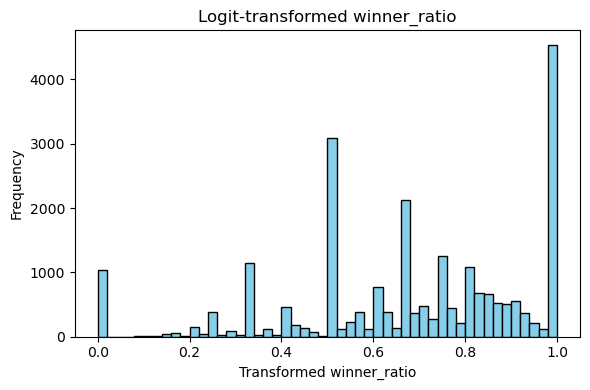

In [82]:
# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(train["winner_ratio"], bins=50, color="skyblue", edgecolor="black")
plt.title("winner_ratio")
plt.xlabel("Transformed winner_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()